In [3]:
import os
import librosa   #thư viện xủ lý tín hiệu âm thanh
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #để đọc file wav 
import warnings
import tensorflow as tf
warnings.filterwarnings("ignore")
from keras.callbacks import TensorBoard, ModelCheckpoint, LearningRateScheduler
train_audio_path = 'D:/DIGIREG/DATA/'
labels=os.listdir(train_audio_path)


In [14]:
from numpy import save
from numpy import asarray

WORD = 6000
WORD_HALF = int(WORD/2)
CHUNK = 10000 
all_wave = []
all_label = []
all_feature = []
for label in labels:
    print("Label:",label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 16000)
        
        leng = len(samples)
        chunk_count = int(leng/CHUNK)
        word_count = 0
        for i in range(0,chunk_count):
            data = samples[i*CHUNK:(i+2)*CHUNK]
            
            energy = abs(data)
            mean = np.mean(energy)
            value = 0
            max_val = 0
            max_idn = 0
            for idn in range(0,len(energy)):
                value += (energy[idn]-value)/1000
                if (idn>WORD_HALF) & (idn<(len(data)-WORD_HALF )):
                    if max_val<value:
                        max_val = value
                        max_idn = idn
            if max_val>(mean*2.5):
                word_count = word_count+1
                data = data[max_idn-WORD_HALF:max_idn+WORD_HALF]
#                 feature_vector = librosa.feature.melspectrogram(y=data, sr=16000)[:40]
#                 feature_vector = librosa.feature.chroma_stft(y=data, sr=16000)
                all_wave.append(data)
#                 all_feature.append(feature_vector)
                all_label.append(label)
        
        print("chunks:",chunk_count," samples:",word_count)
save('all_wave', all_wave)
#save('all_feature', all_feature)
save('all_label', all_label)

Label: 0
chunks: 75  samples: 73
chunks: 61  samples: 51
chunks: 85  samples: 78
chunks: 2  samples: 0
chunks: 2  samples: 0
chunks: 2  samples: 0
chunks: 2  samples: 0
chunks: 2  samples: 0
Label: 1
chunks: 73  samples: 70
chunks: 107  samples: 90
chunks: 75  samples: 72
chunks: 2  samples: 1
chunks: 2  samples: 2
chunks: 2  samples: 1
chunks: 2  samples: 1
chunks: 2  samples: 1
chunks: 2  samples: 1
chunks: 1  samples: 1
chunks: 2  samples: 1
chunks: 2  samples: 2
chunks: 2  samples: 2
chunks: 2  samples: 1
chunks: 2  samples: 1
chunks: 2  samples: 1
chunks: 2  samples: 1
chunks: 2  samples: 1
chunks: 2  samples: 1
chunks: 1  samples: 1
chunks: 1  samples: 1
chunks: 1  samples: 1
chunks: 2  samples: 2
chunks: 2  samples: 1
chunks: 2  samples: 2
chunks: 2  samples: 1
chunks: 2  samples: 1
chunks: 1  samples: 1
Label: 2
chunks: 73  samples: 60
chunks: 75  samples: 61
chunks: 77  samples: 73
chunks: 1  samples: 0
chunks: 2  samples: 1
chunks: 1  samples: 1
chunks: 1  samples: 1
chunks: 

0


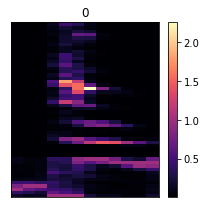

0


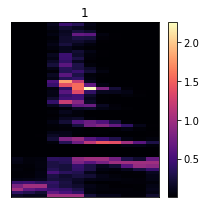

0


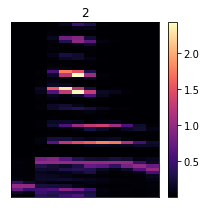

0


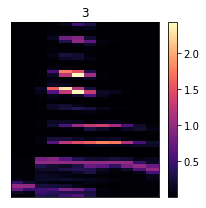

0


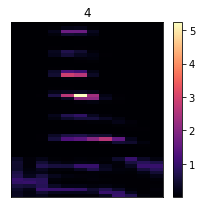

0


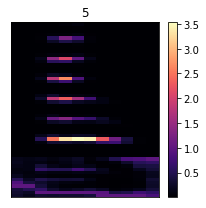

0


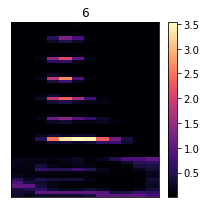

0


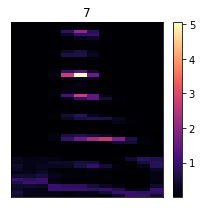

0


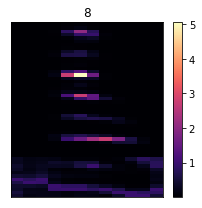

0


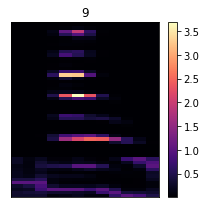

0


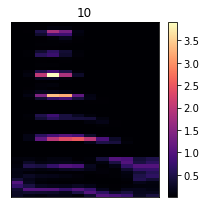

0


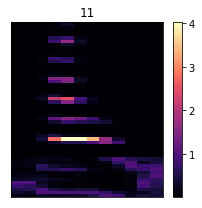

0


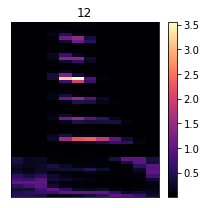

0


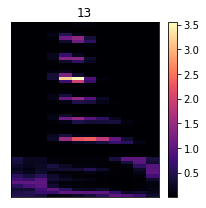

0


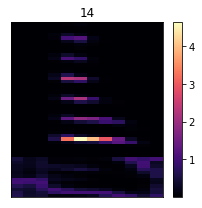

0


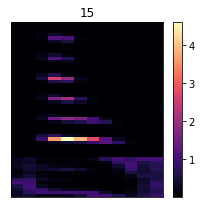

0


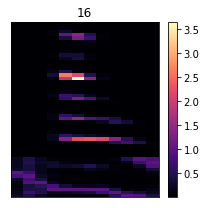

0


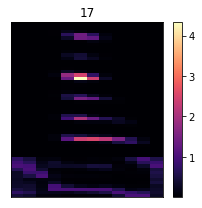

0


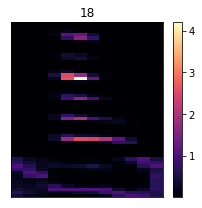

0


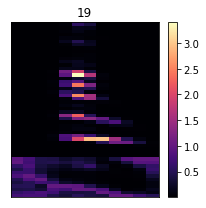

0


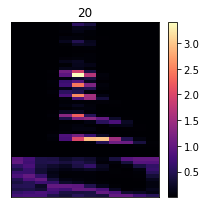

0


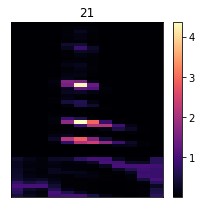

0


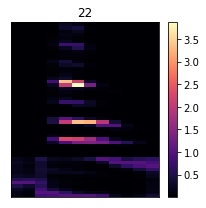

0


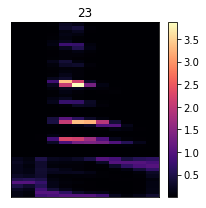

0


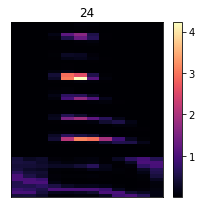

0


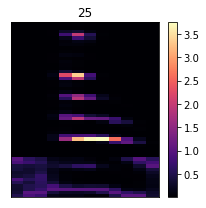

0


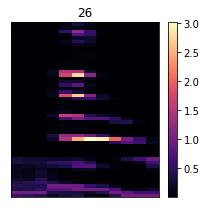

0


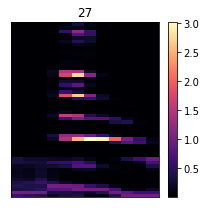

0


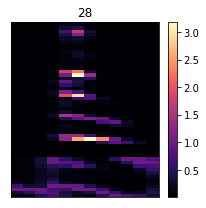

0


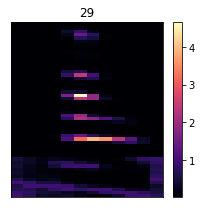

0


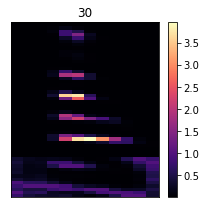

0


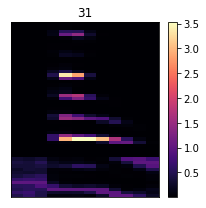

0


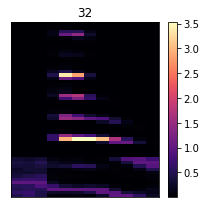

0


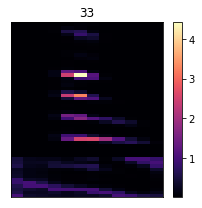

0


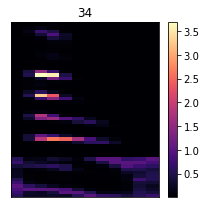

0


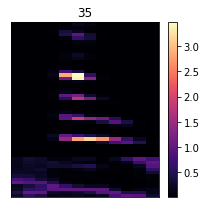

0


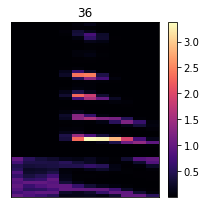

0


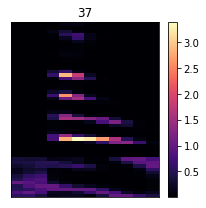

0


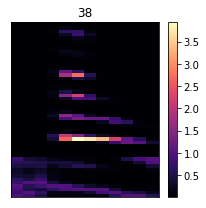

0


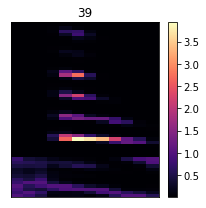

0


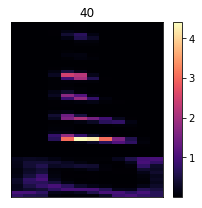

0


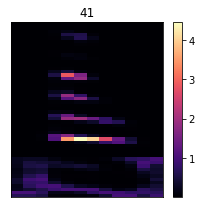

0


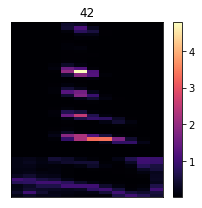

0


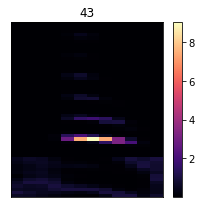

0


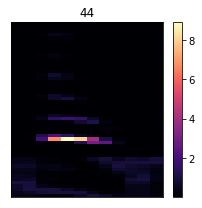

0


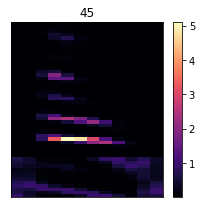

0


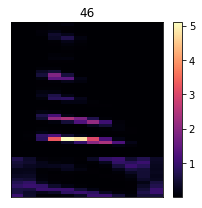

0


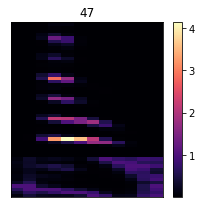

0


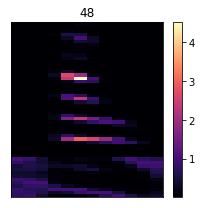

0


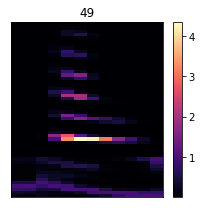

0


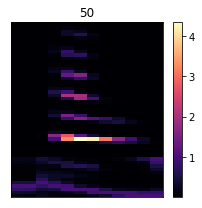

0


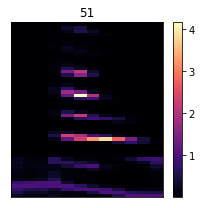

0


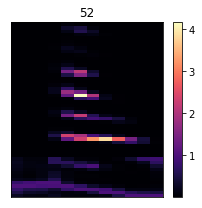

0


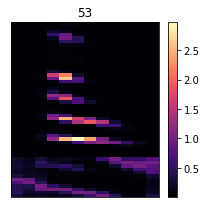

0


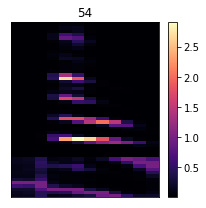

0


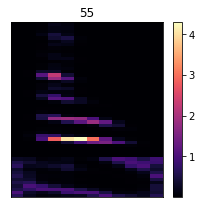

0


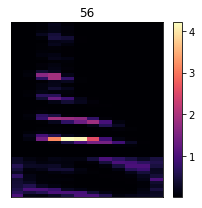

0


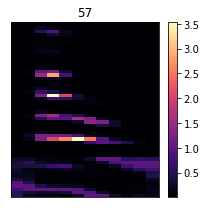

0


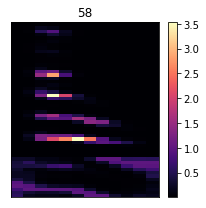

0


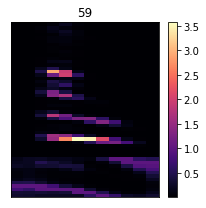

0


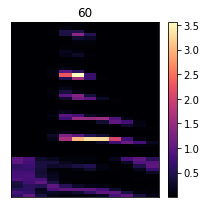

0


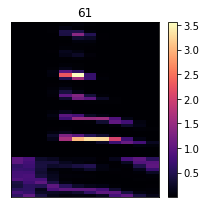

0


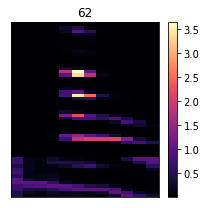

0


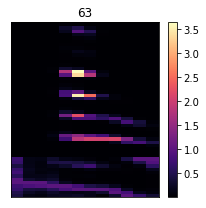

0


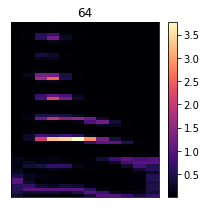

0


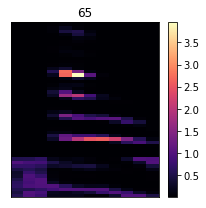

0


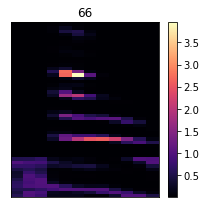

0


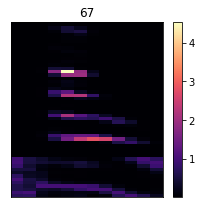

0


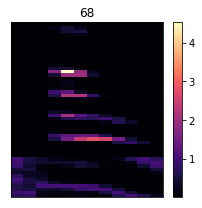

0


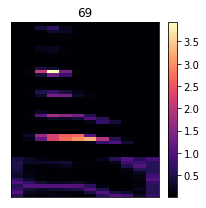

0


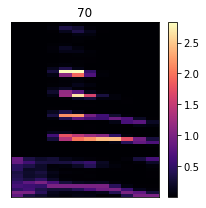

0


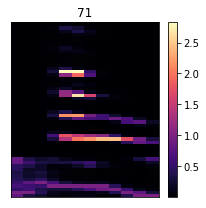

0


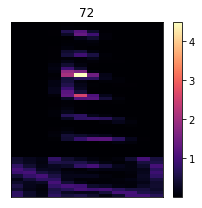

0


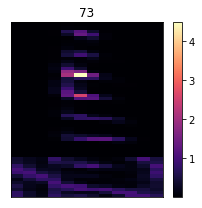

0


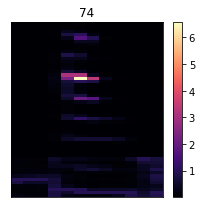

0


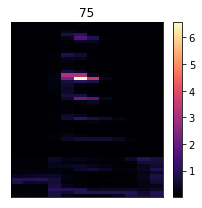

0


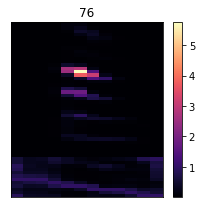

0


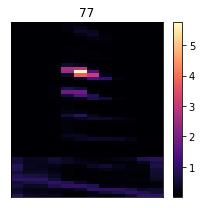

0


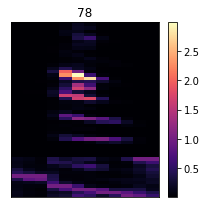

0


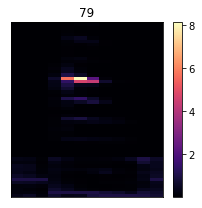

0


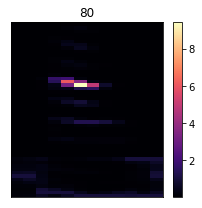

0


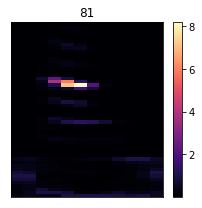

0


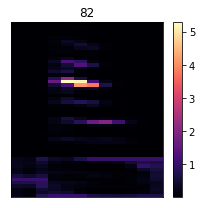

0


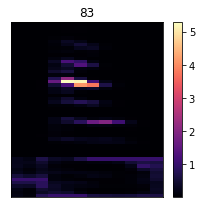

0


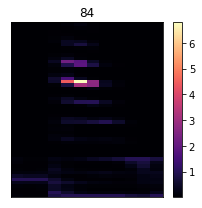

0


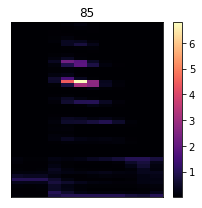

0


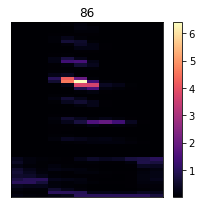

0


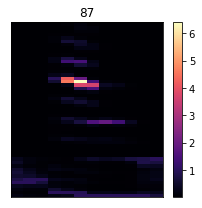

0


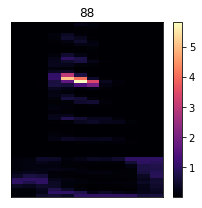

0


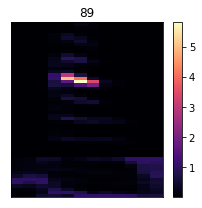

0


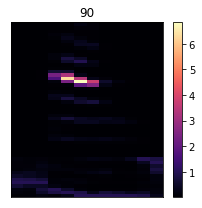

0


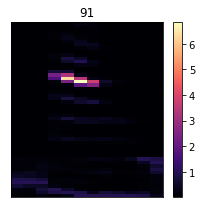

0


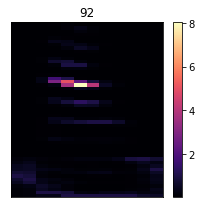

0


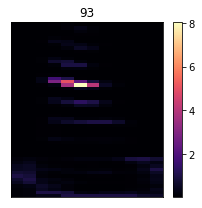

0


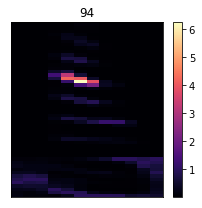

0


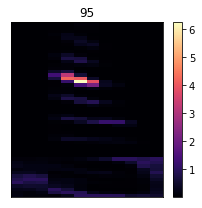

0


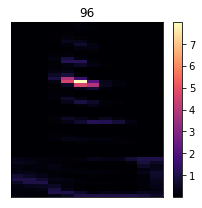

0


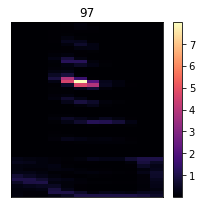

0


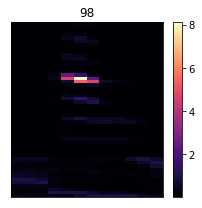

0


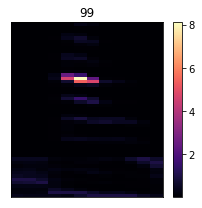

0


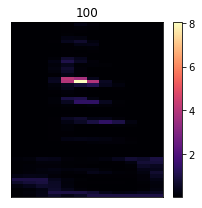

0


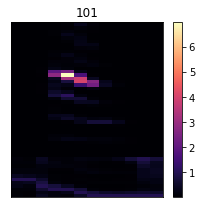

0


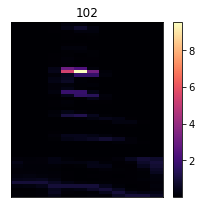

0


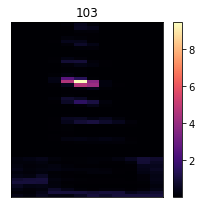

0


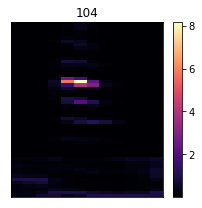

0


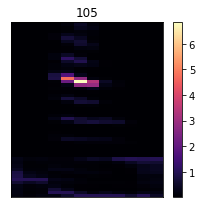

0


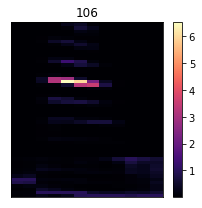

0


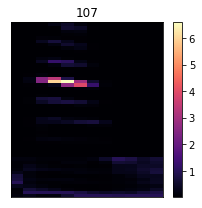

0


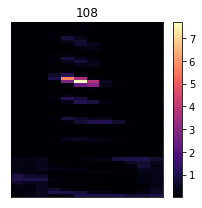

0


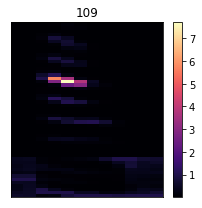

0


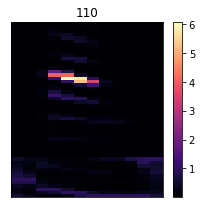

0


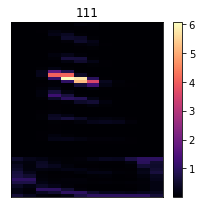

0


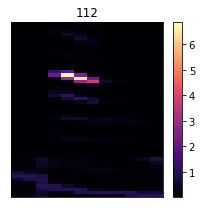

0


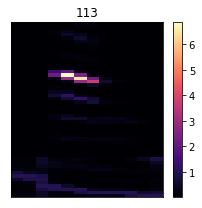

0


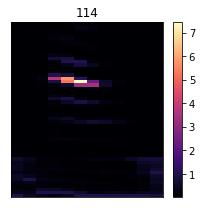

0


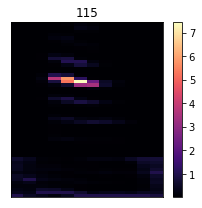

0


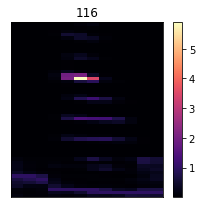

0


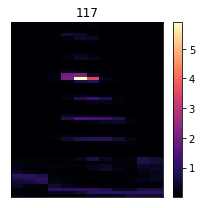

0


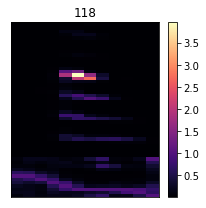

0


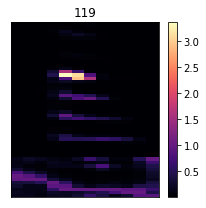

0


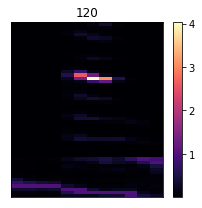

0


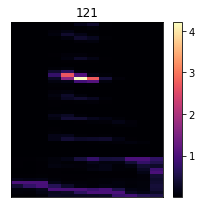

0


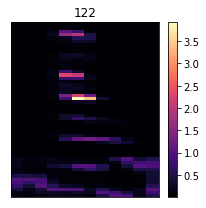

0


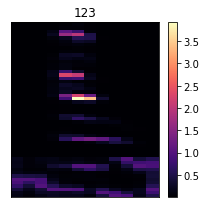

0


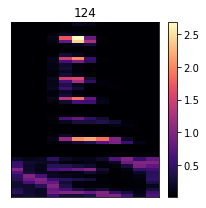

0


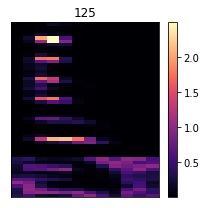

0


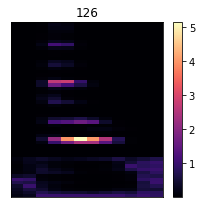

0


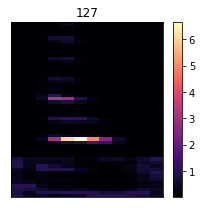

0


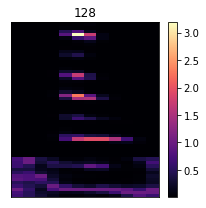

0


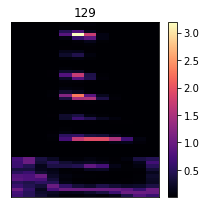

0


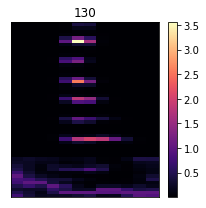

0


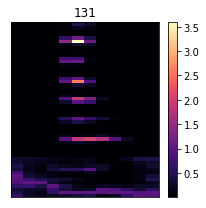

0


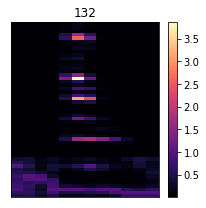

0


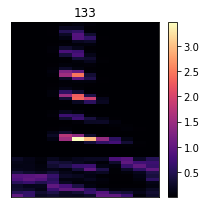

0


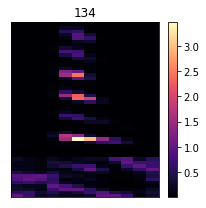

0


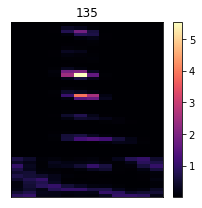

0


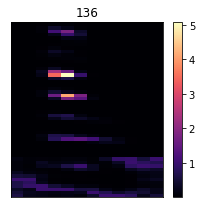

0


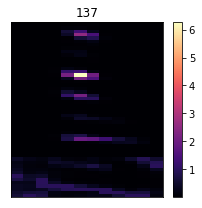

0


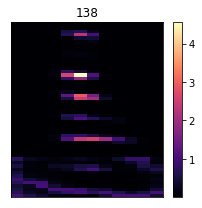

0


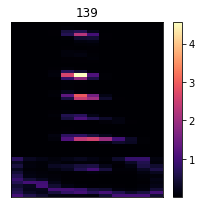

0


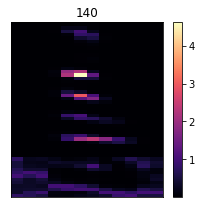

0


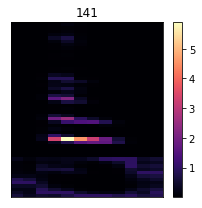

0


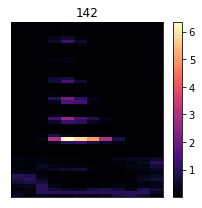

0


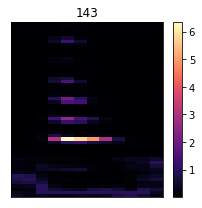

0


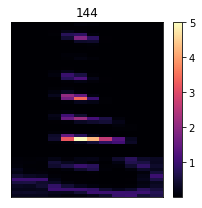

0


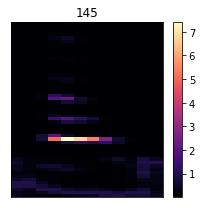

0


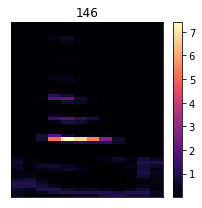

0


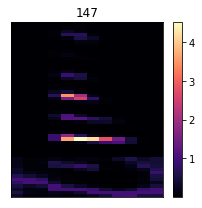

0


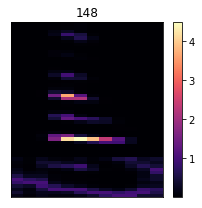

0


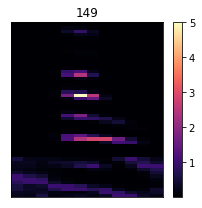

0


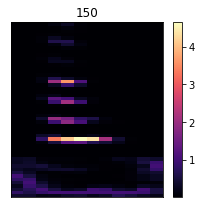

0


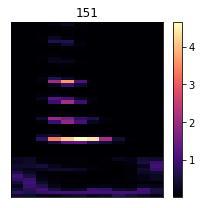

0


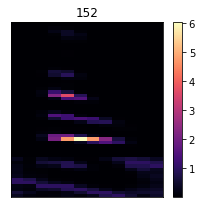

0


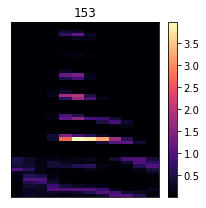

0


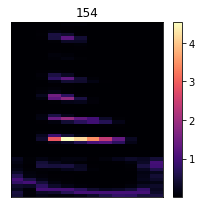

0


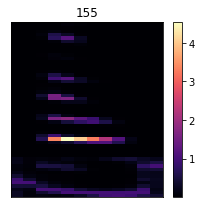

0


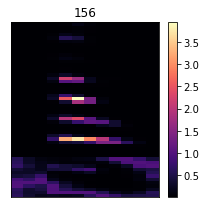

0


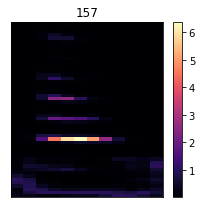

0


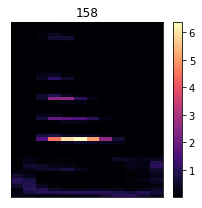

0


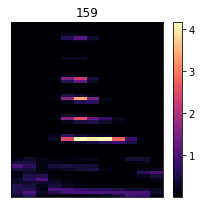

0


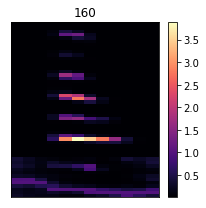

0


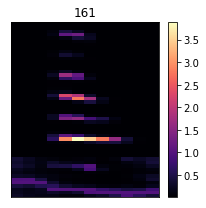

0


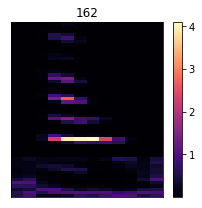

0


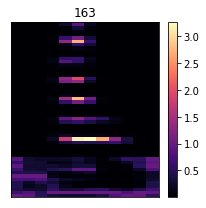

0


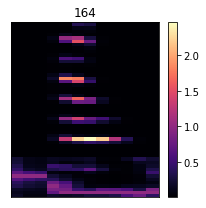

0


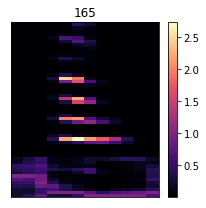

0


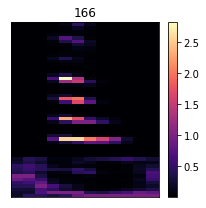

0


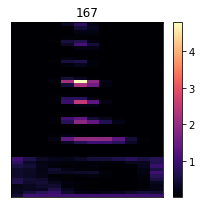

0


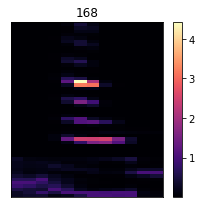

0


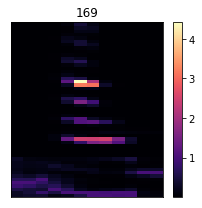

0


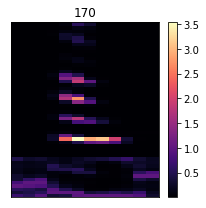

0


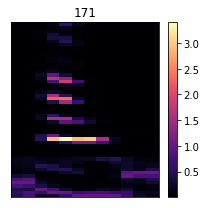

0


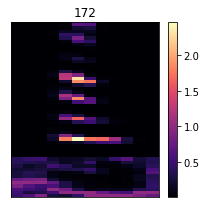

0


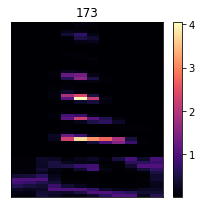

0


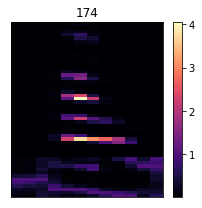

0


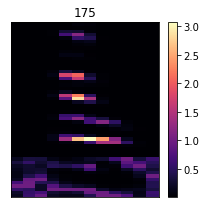

0


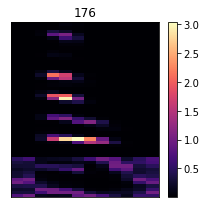

0


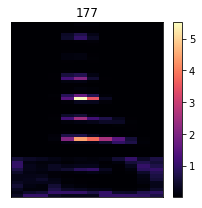

0


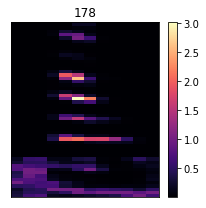

0


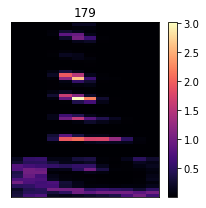

0


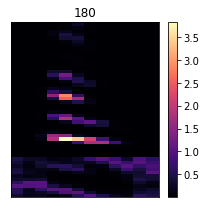

0


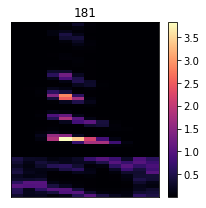

0


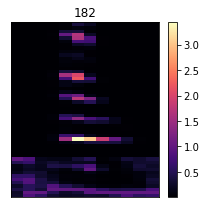

0


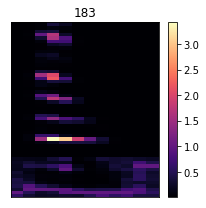

0


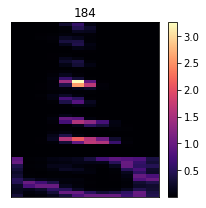

0


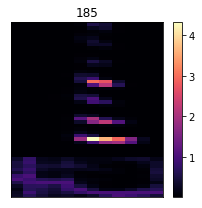

0


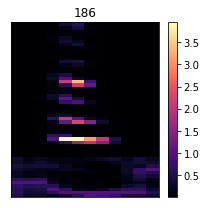

0


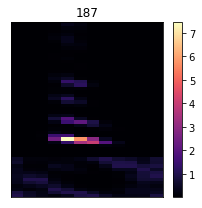

0


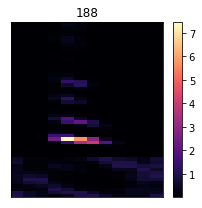

0


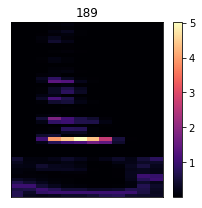

0


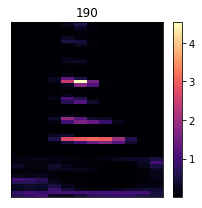

0


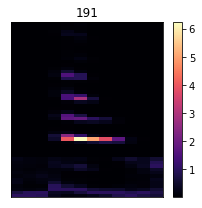

0


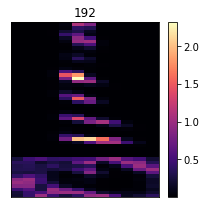

0


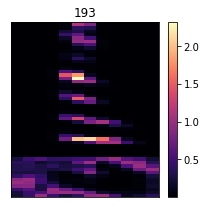

0


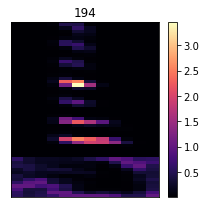

0


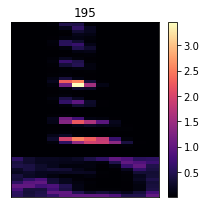

0


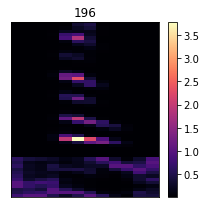

1


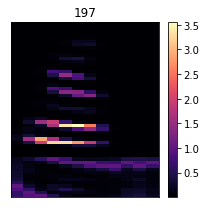

1


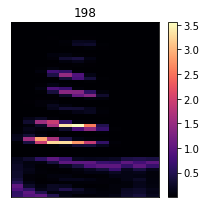

1


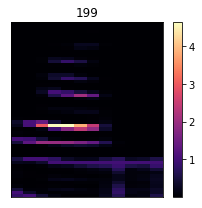

1


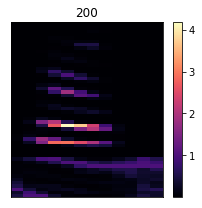

1


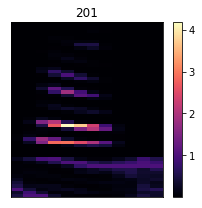

1


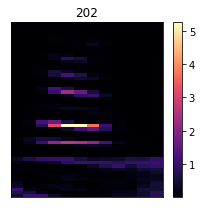

1


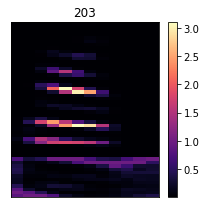

1


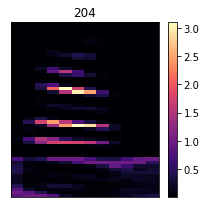

1


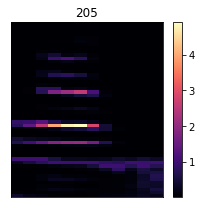

1


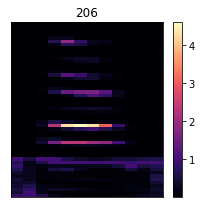

1


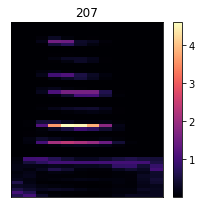

1


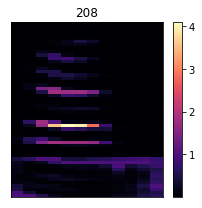

1


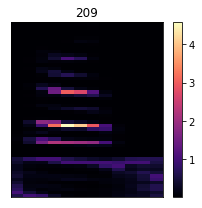

1


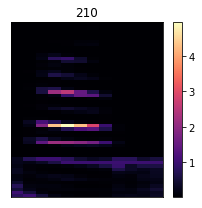

1


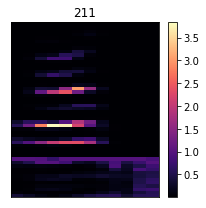

1


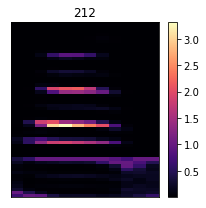

1


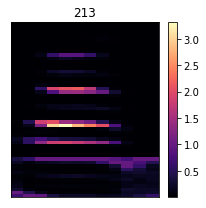

1


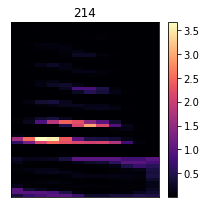

1


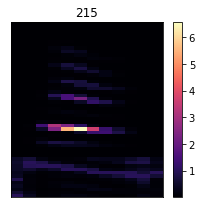

1


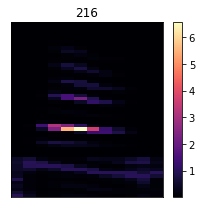

1


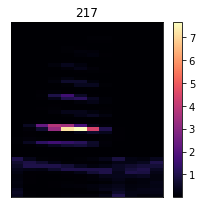

1


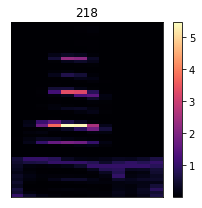

1


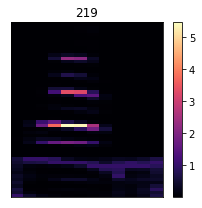

1


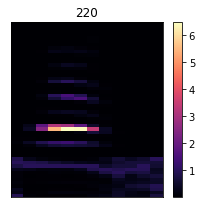

1


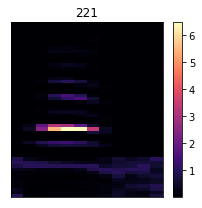

1


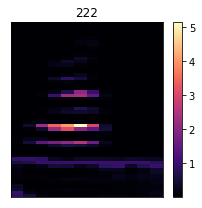

1


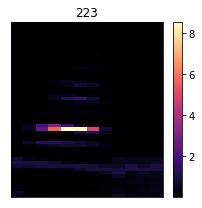

1


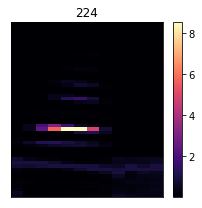

1


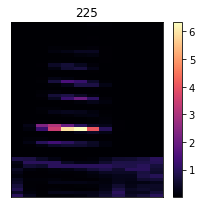

1


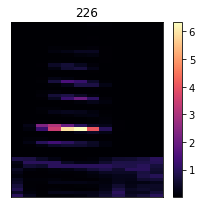

1


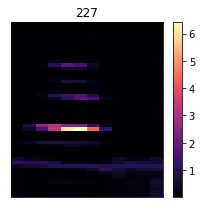

1


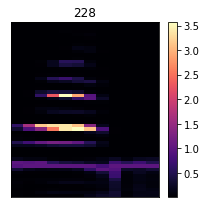

1


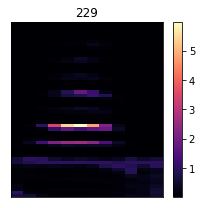

1


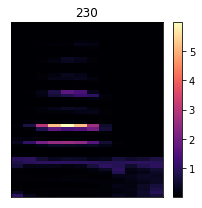

1


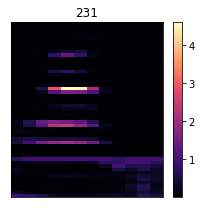

1


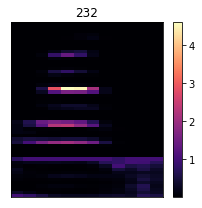

1


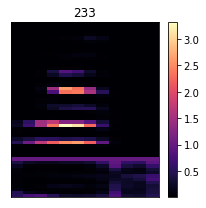

1


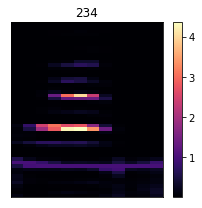

1


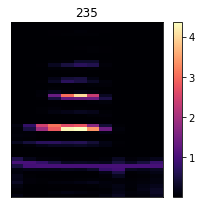

1


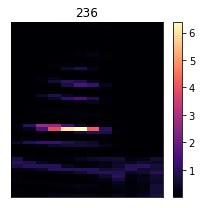

1


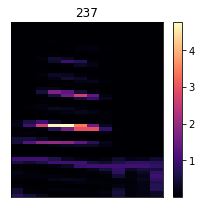

1


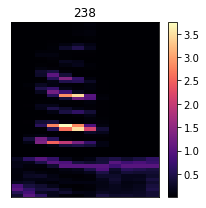

1


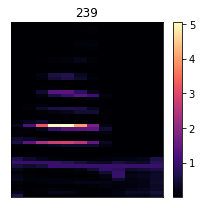

1


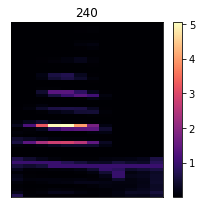

1


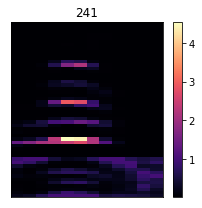

1


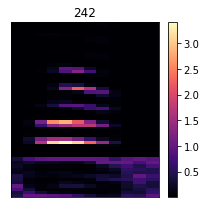

1


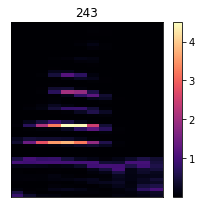

1


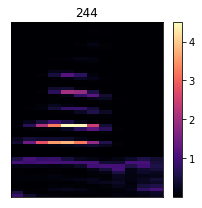

1


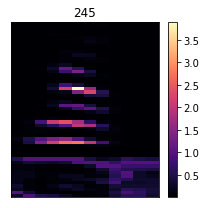

1


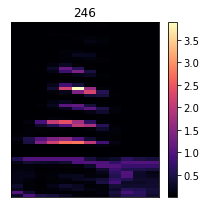

1


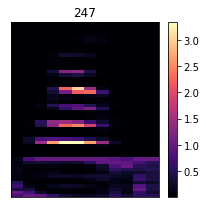

1


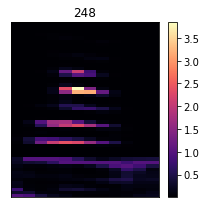

1


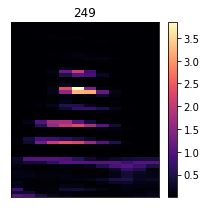

1


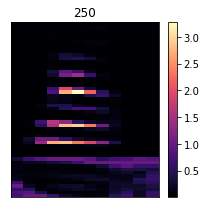

1


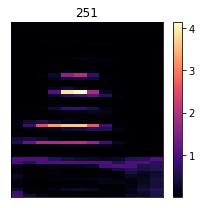

1


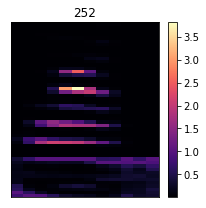

1


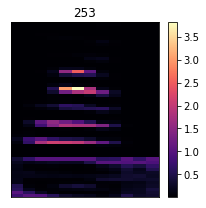

1


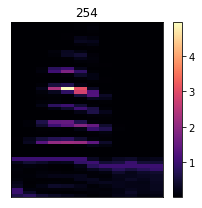

1


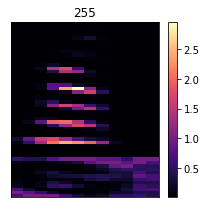

1


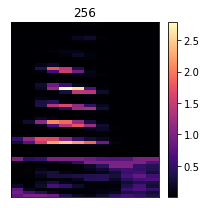

1


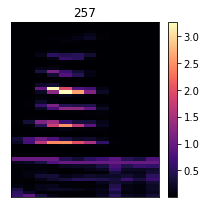

1


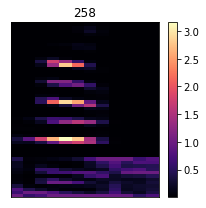

1


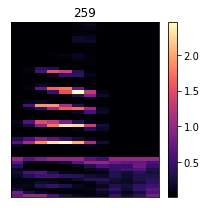

1


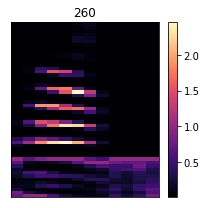

1


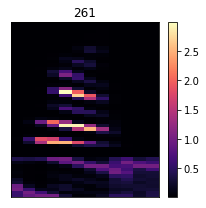

1


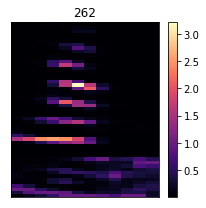

1


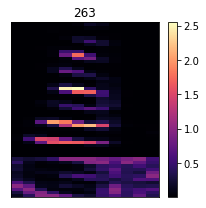

1


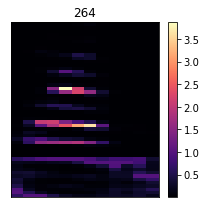

1


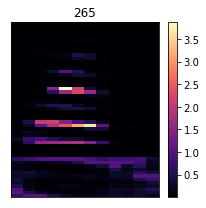

1


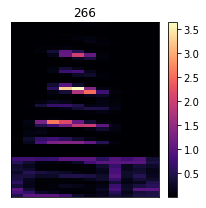

1


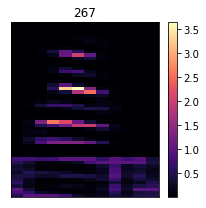

1


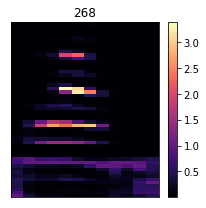

1


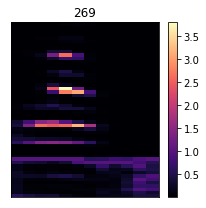

1


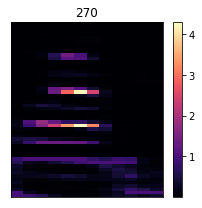

1


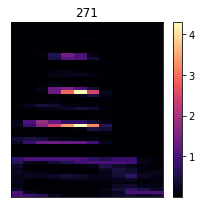

1


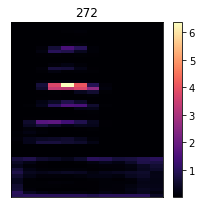

1


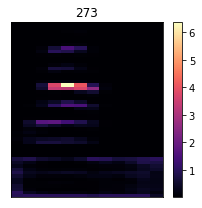

1


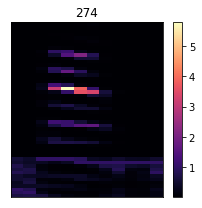

1


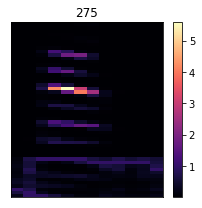

1


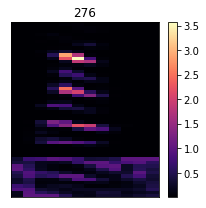

1


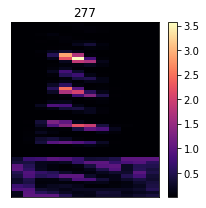

1


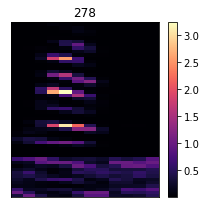

1


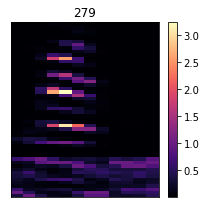

1


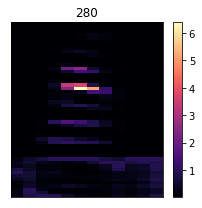

1


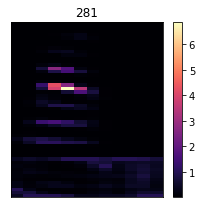

1


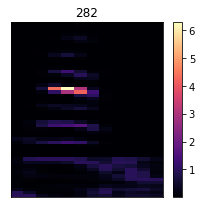

1


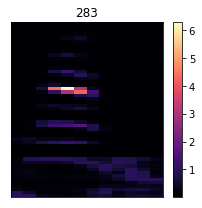

1


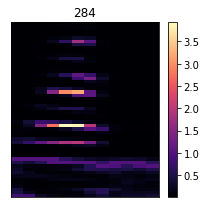

1


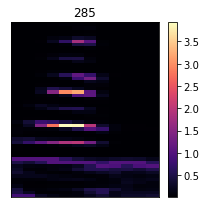

1


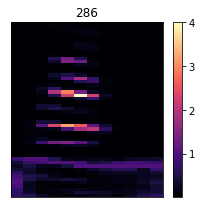

1


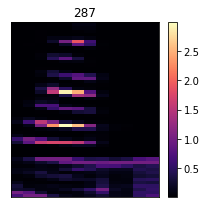

1


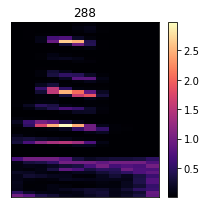

1


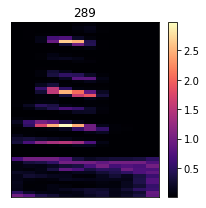

1


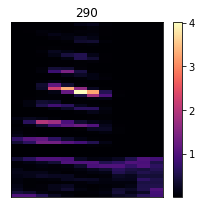

1


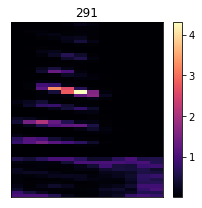

1


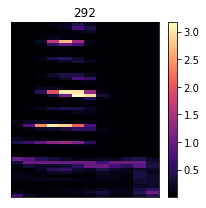

1


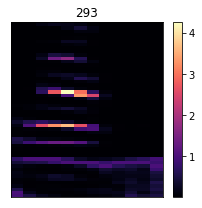

1


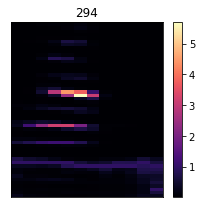

1


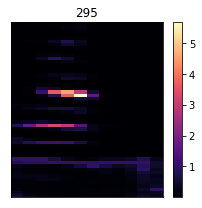

1


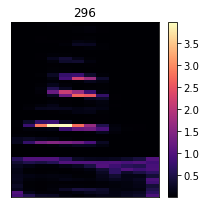

1


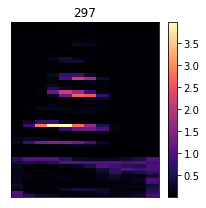

1


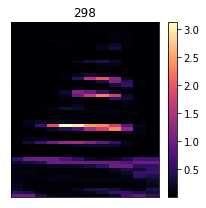

1


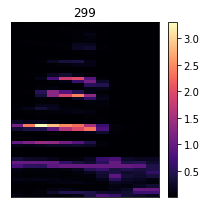

1


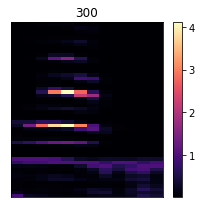

1


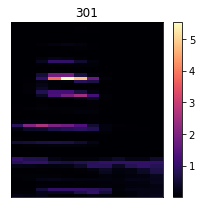

1


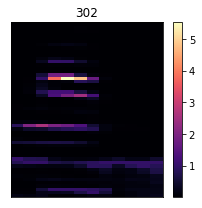

1


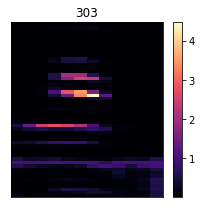

1


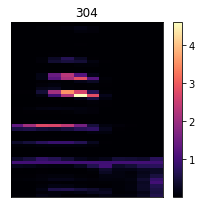

1


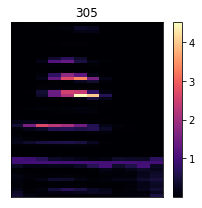

1


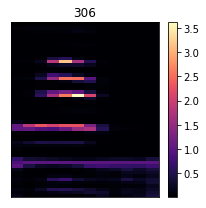

1


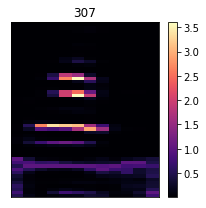

1


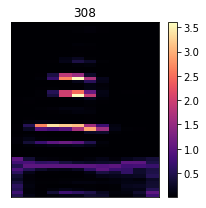

1


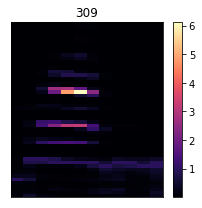

1


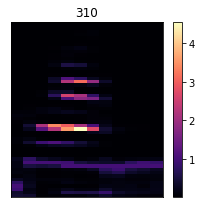

1


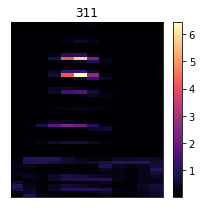

1


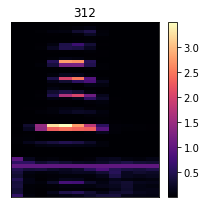

1


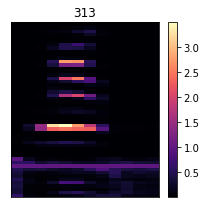

1


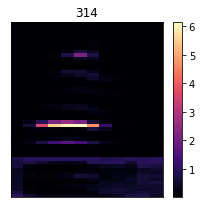

1


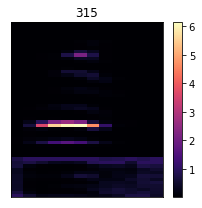

1


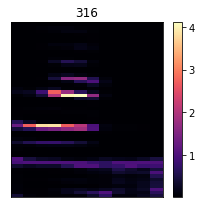

1


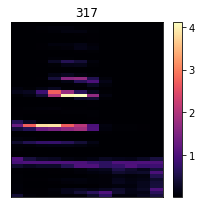

1


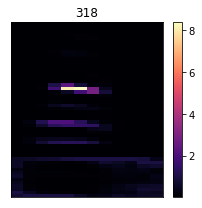

1


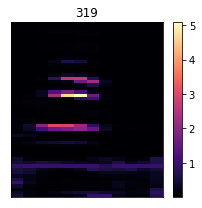

1


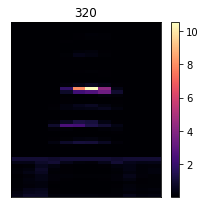

1


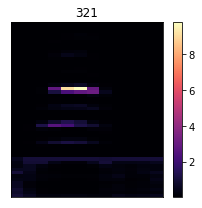

1


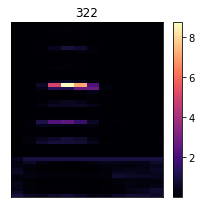

1


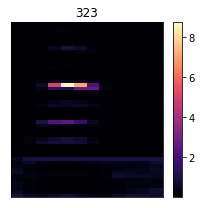

1


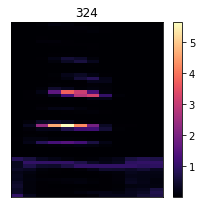

1


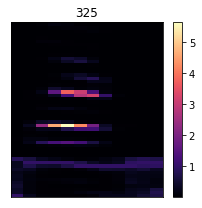

1


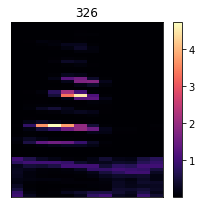

1


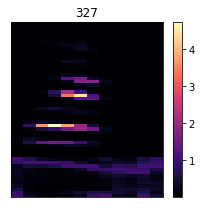

1


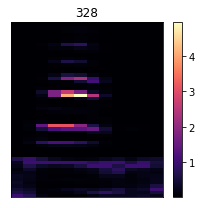

1


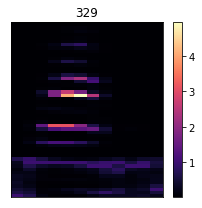

1


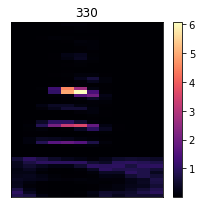

1


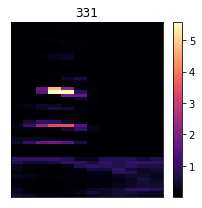

1


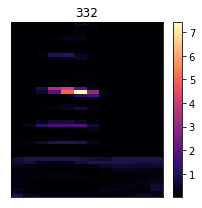

1


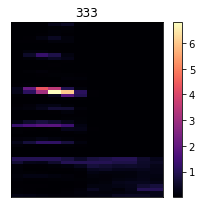

1


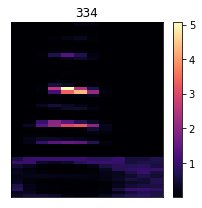

1


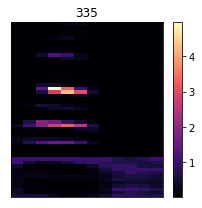

1


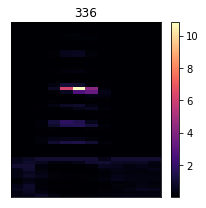

1


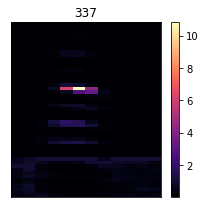

1


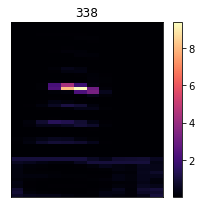

1


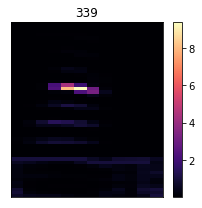

1


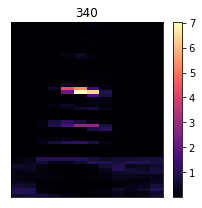

1


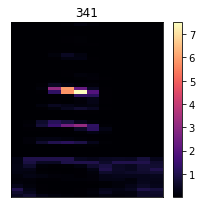

1


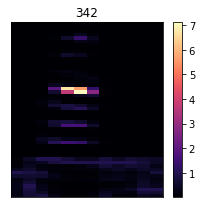

1


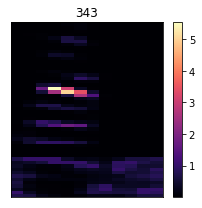

1


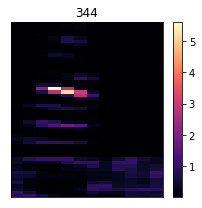

1


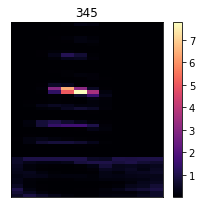

1


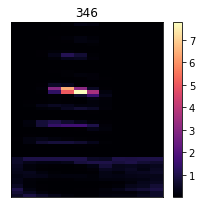

1


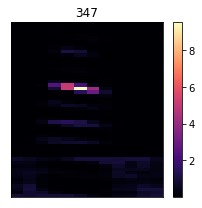

1


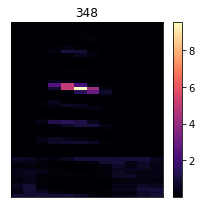

1


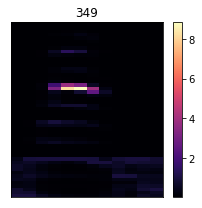

1


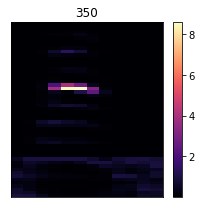

1


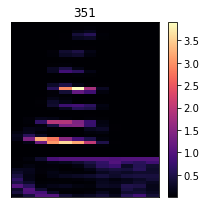

1


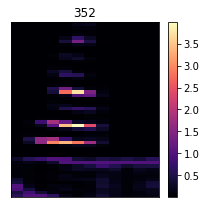

1


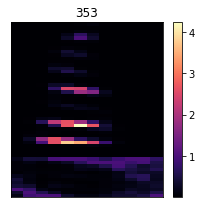

1


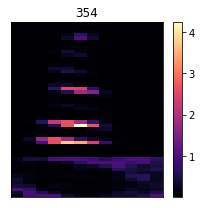

1


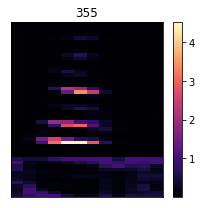

1


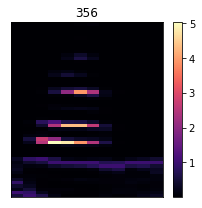

1


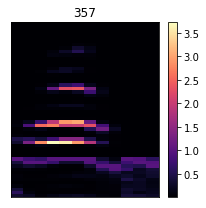

1


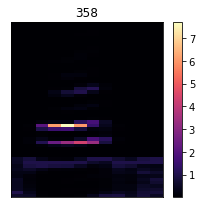

1


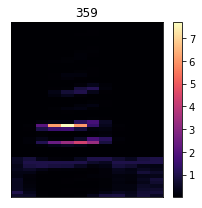

1


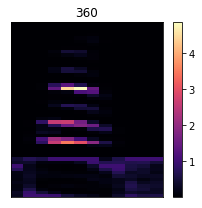

1


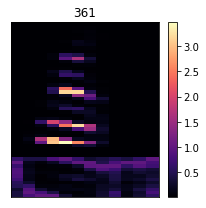

1


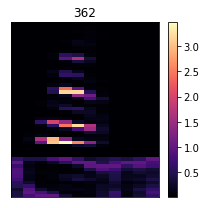

1


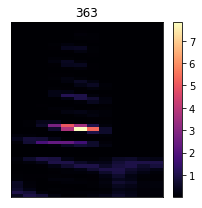

1


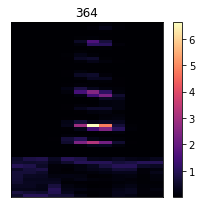

1


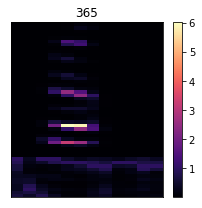

1


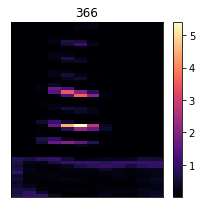

1


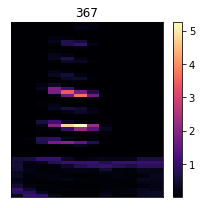

1


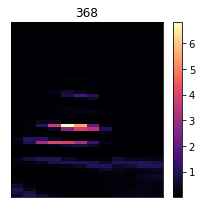

1


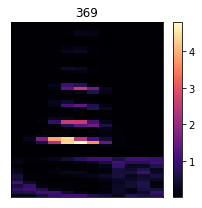

1


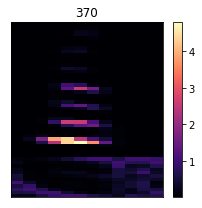

1


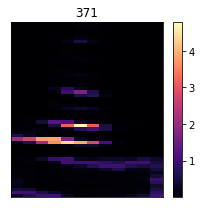

1


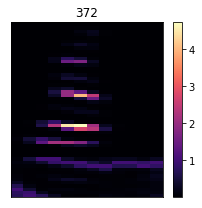

1


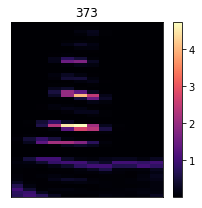

1


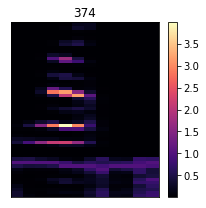

1


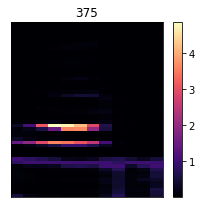

1


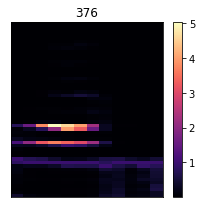

1


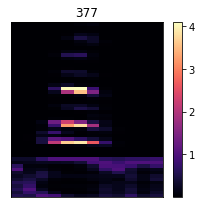

1


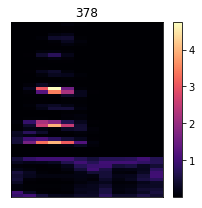

1


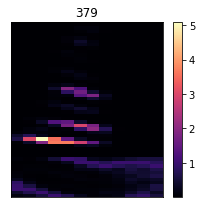

1


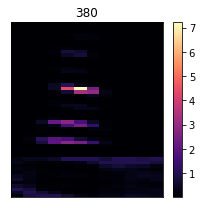

1


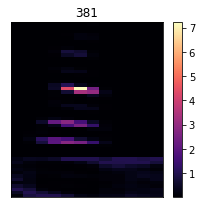

1


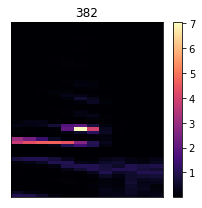

1


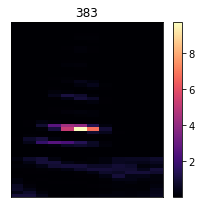

1


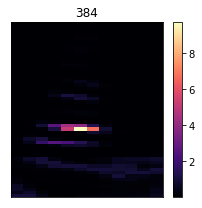

1


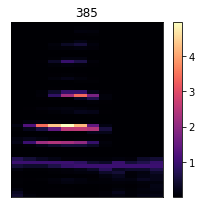

1


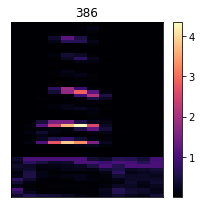

1


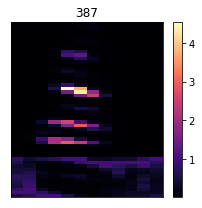

1


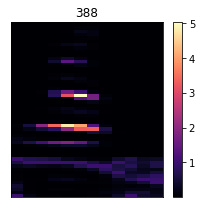

1


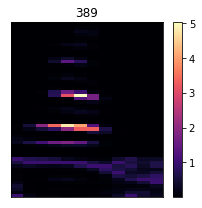

1


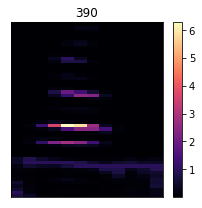

1


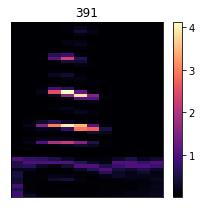

1


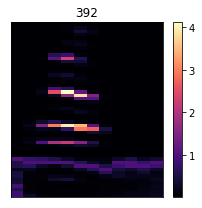

1


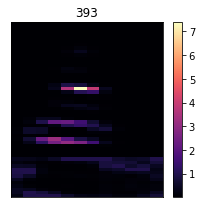

1


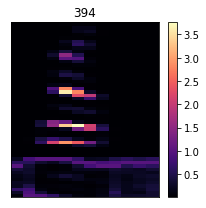

1


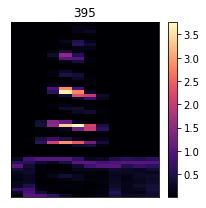

1


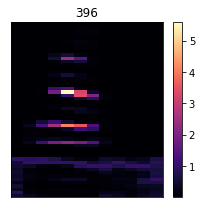

1


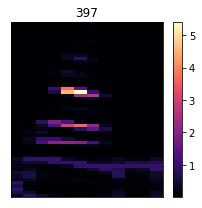

1


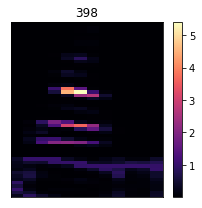

1


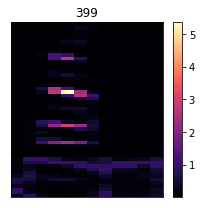

1


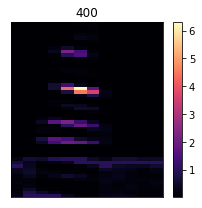

1


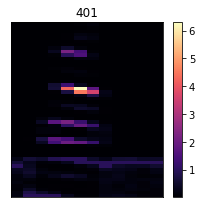

1


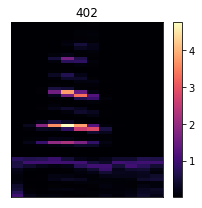

1


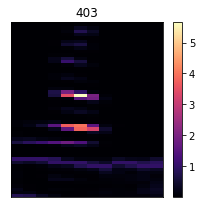

1


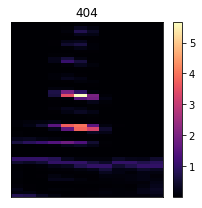

1


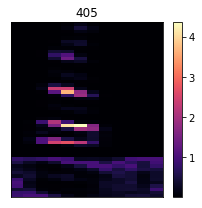

1


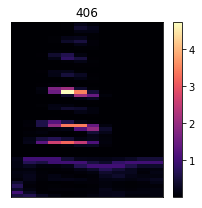

1


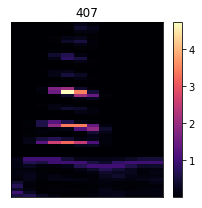

1


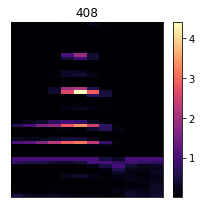

1


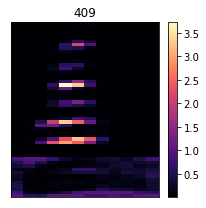

1


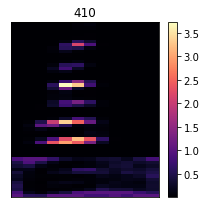

1


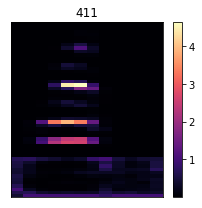

1


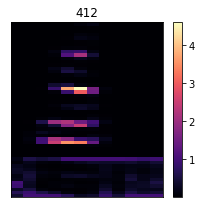

1


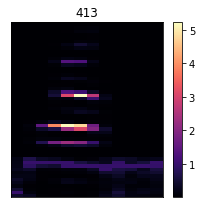

1


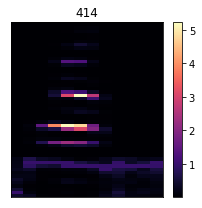

1


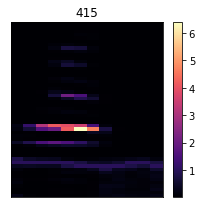

1


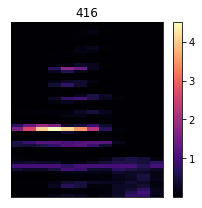

1


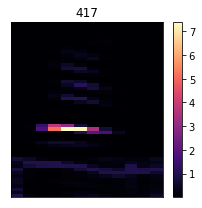

1


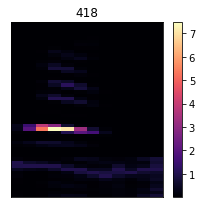

1


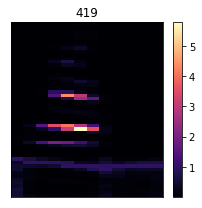

1


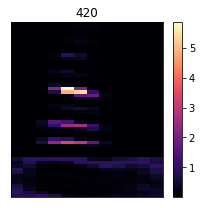

1


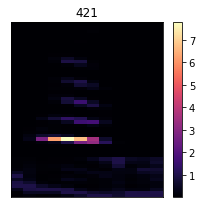

1


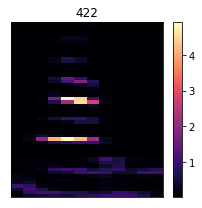

1


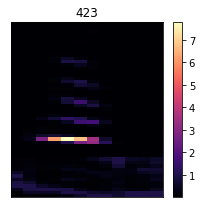

1


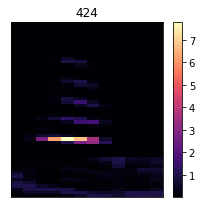

1


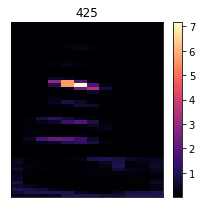

1


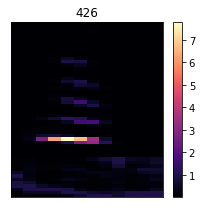

1


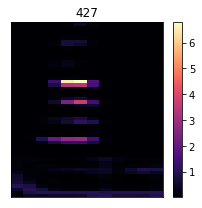

1


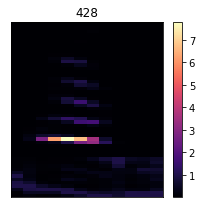

1


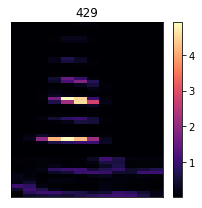

1


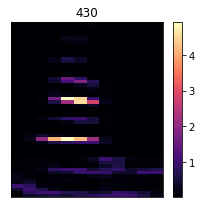

1


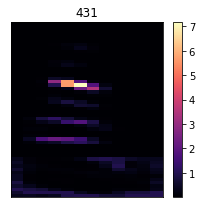

1


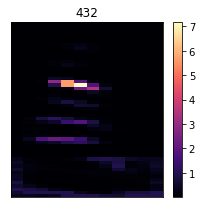

1


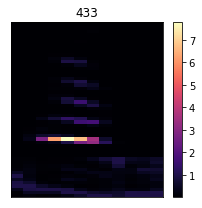

1


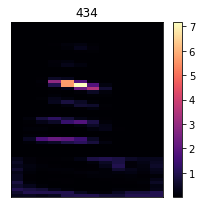

1


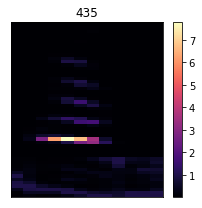

1


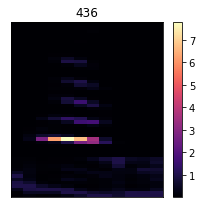

1


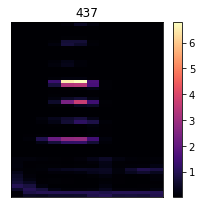

1


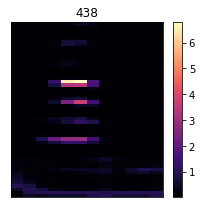

1


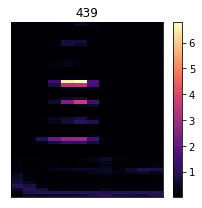

1


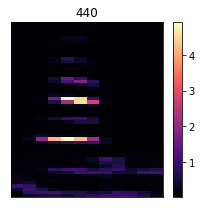

1


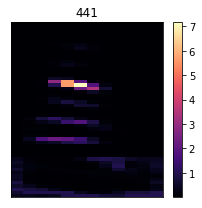

1


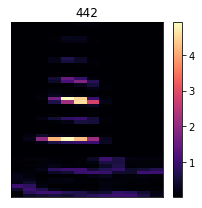

1


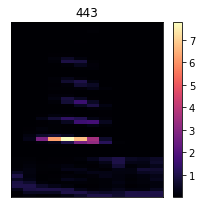

1


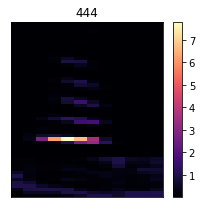

1


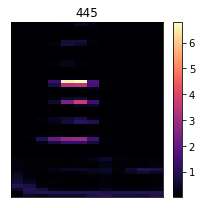

2


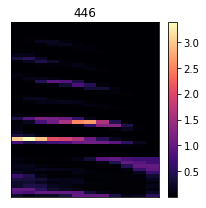

2


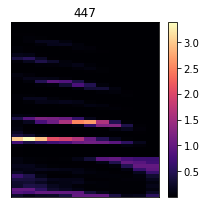

2


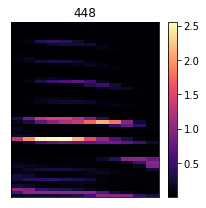

2


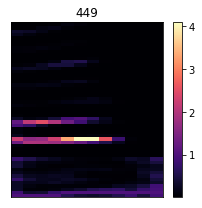

2


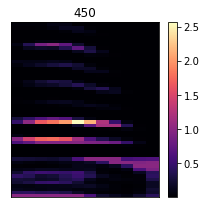

2


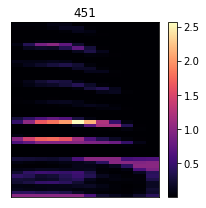

2


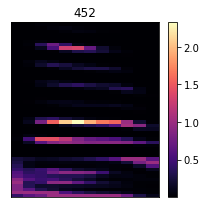

2


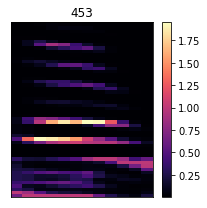

2


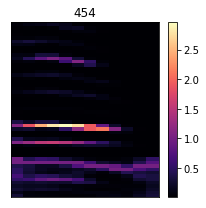

2


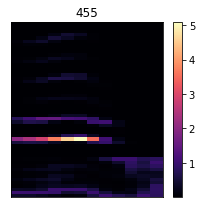

2


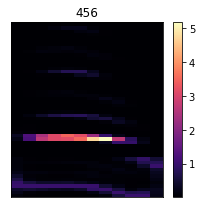

2


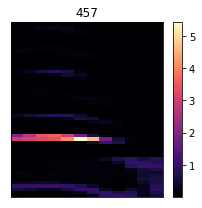

2


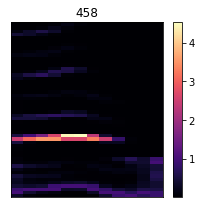

2


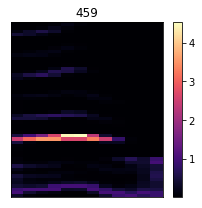

2


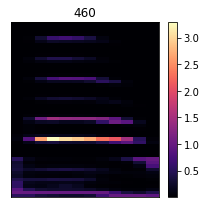

2


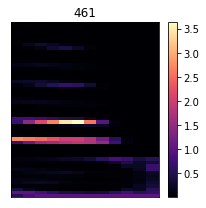

2


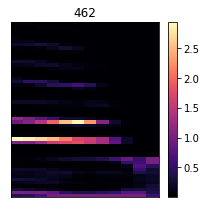

2


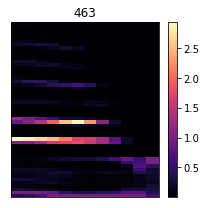

2


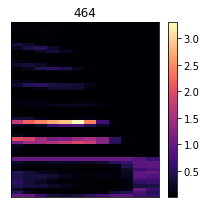

2


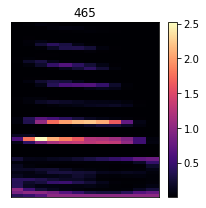

2


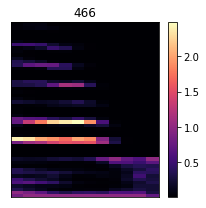

2


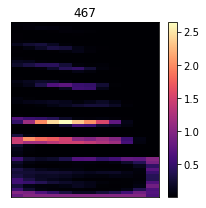

2


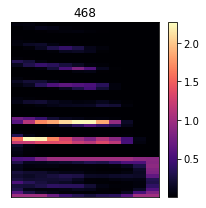

2


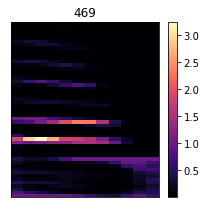

2


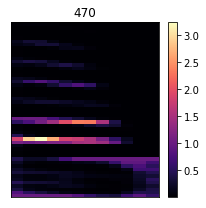

2


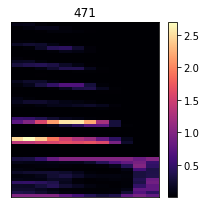

2


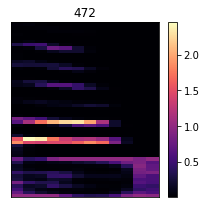

2


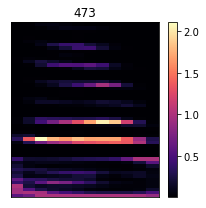

2


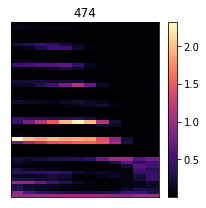

2


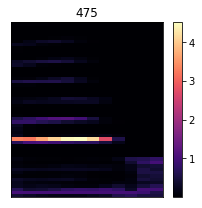

2


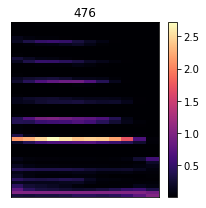

2


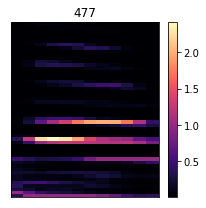

2


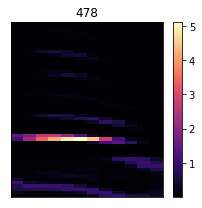

2


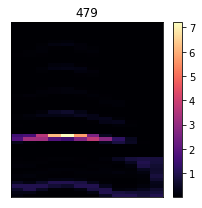

2


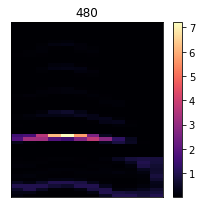

2


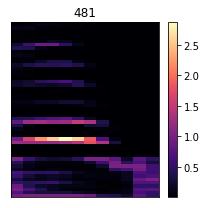

2


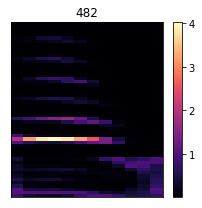

2


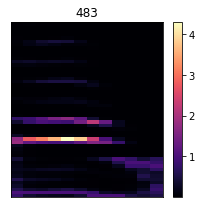

2


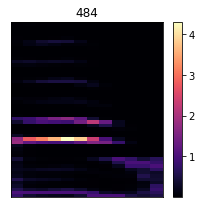

2


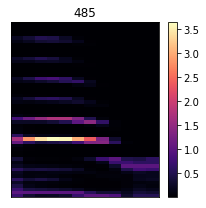

2


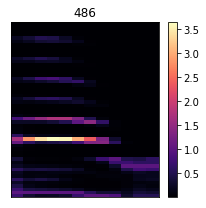

2


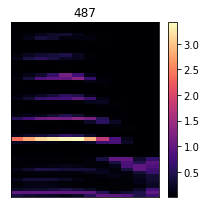

2


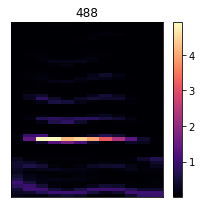

2


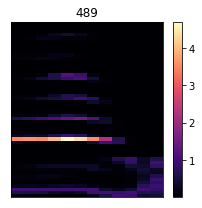

2


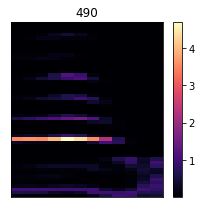

2


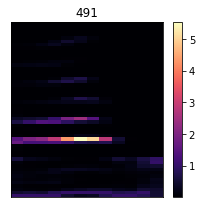

2


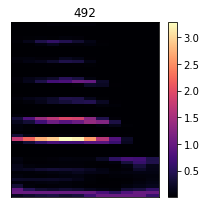

2


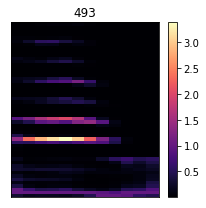

2


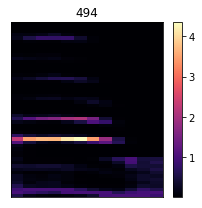

2


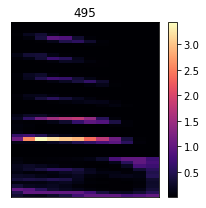

2


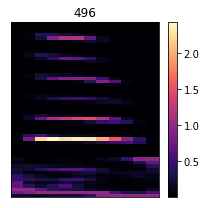

2


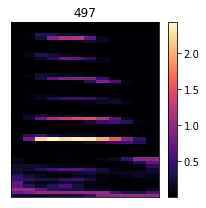

2


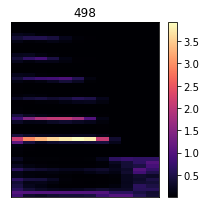

2


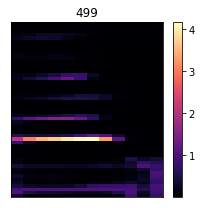

2


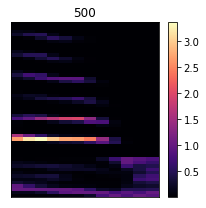

2


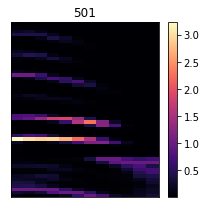

2


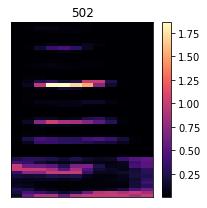

2


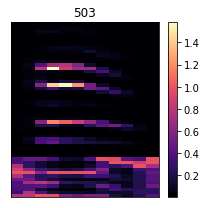

2


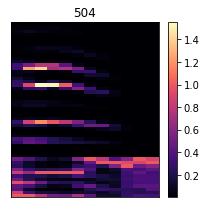

2


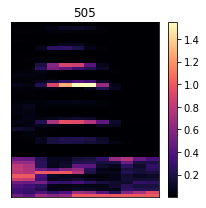

2


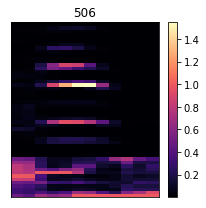

2


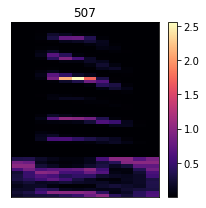

2


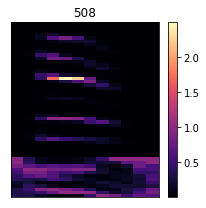

2


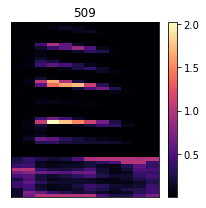

2


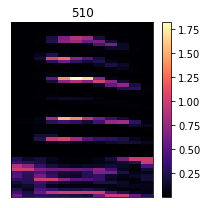

2


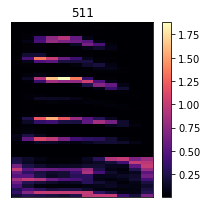

2


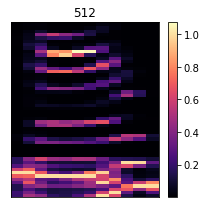

2


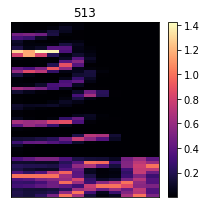

2


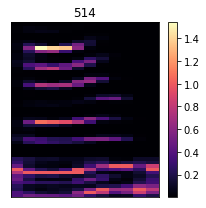

2


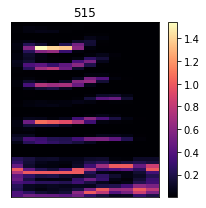

2


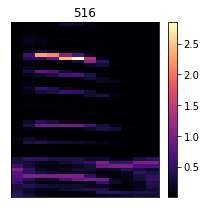

2


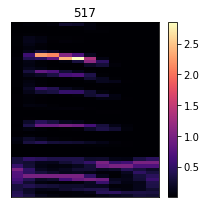

2


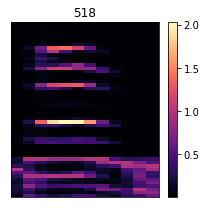

2


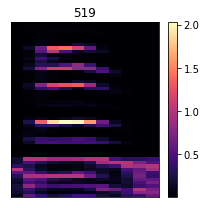

2


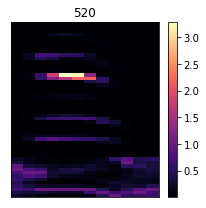

2


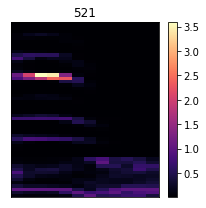

2


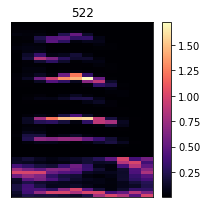

2


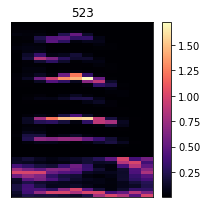

2


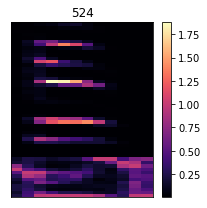

2


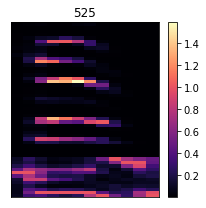

2


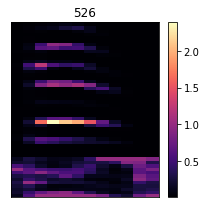

2


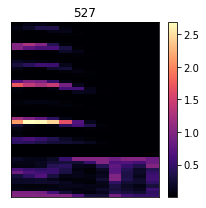

2


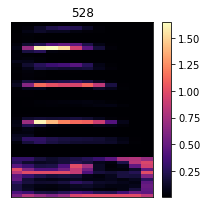

2


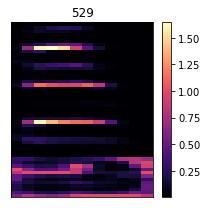

2


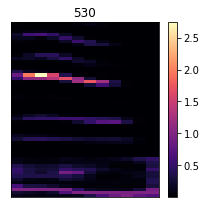

2


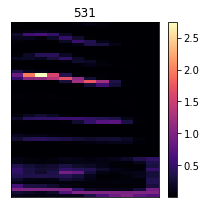

2


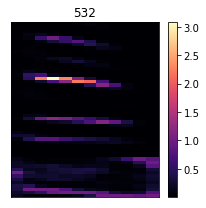

2


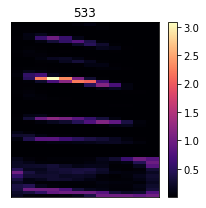

2


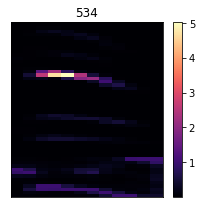

2


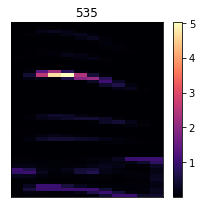

2


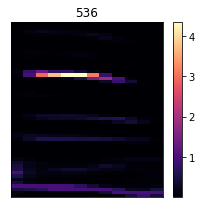

2


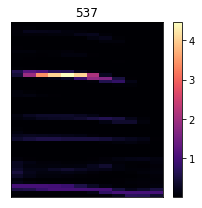

2


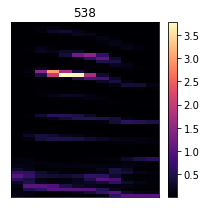

2


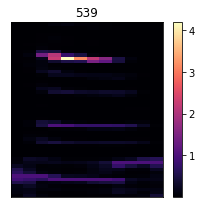

2


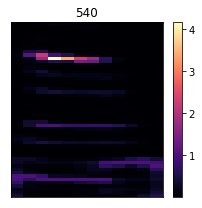

2


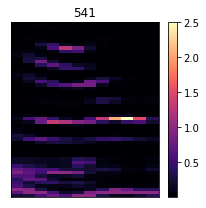

2


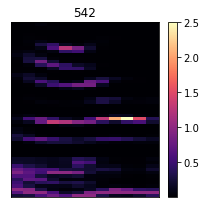

2


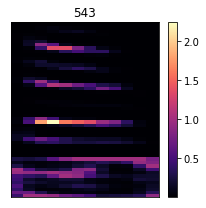

2


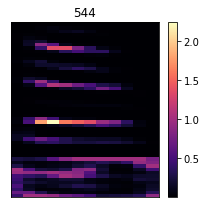

2


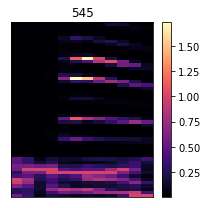

2


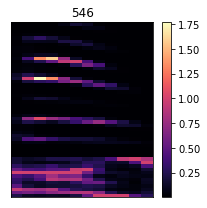

2


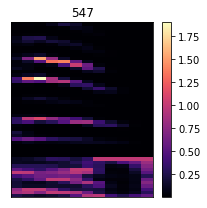

2


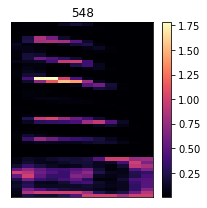

2


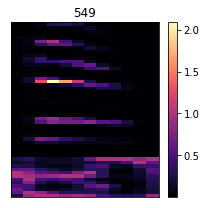

2


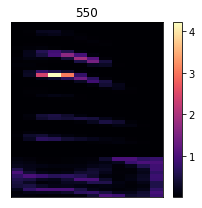

2


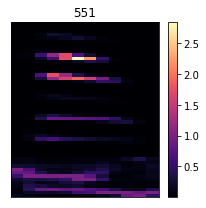

2


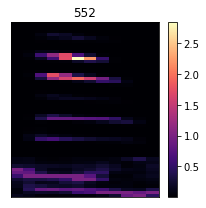

2


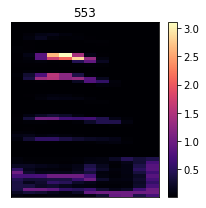

2


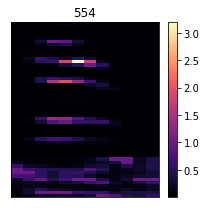

2


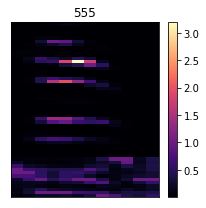

2


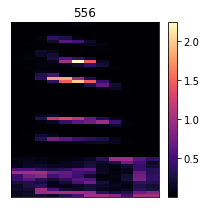

2


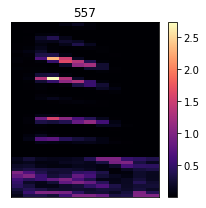

2


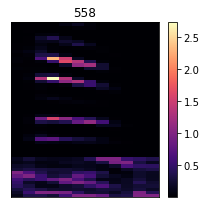

2


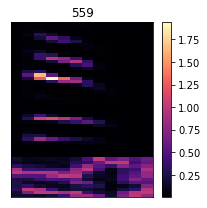

2


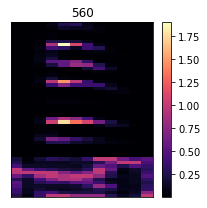

2


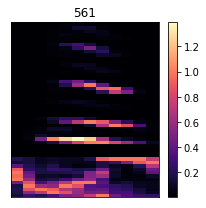

2


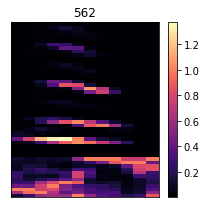

2


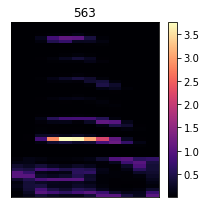

2


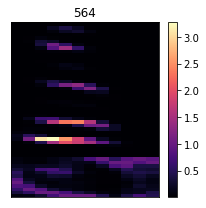

2


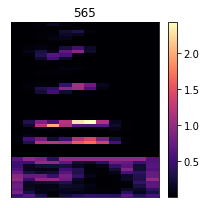

2


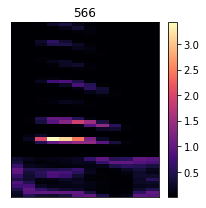

2


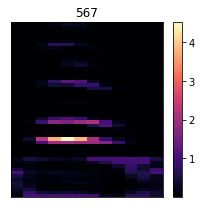

2


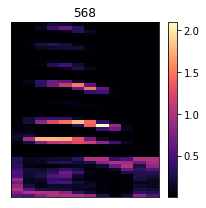

2


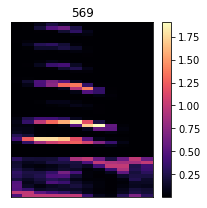

2


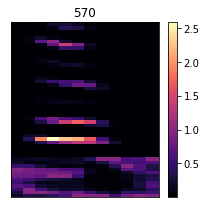

2


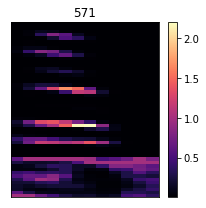

2


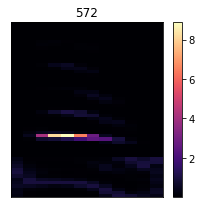

2


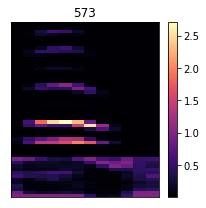

2


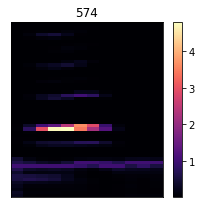

2


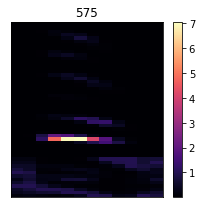

2


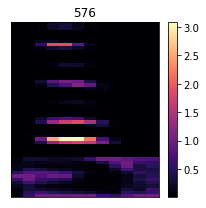

2


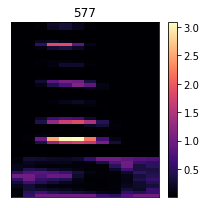

2


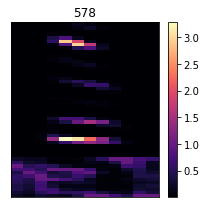

2


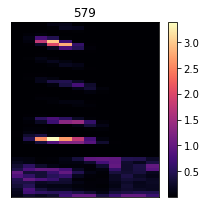

2


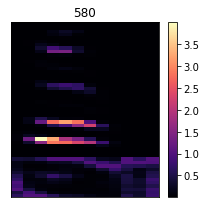

2


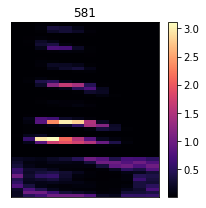

2


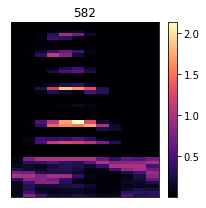

2


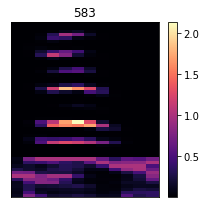

2


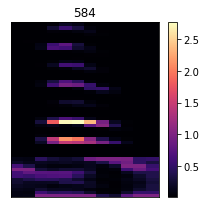

2


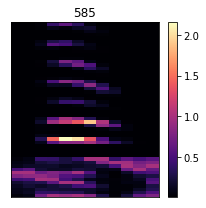

2


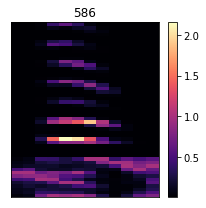

2


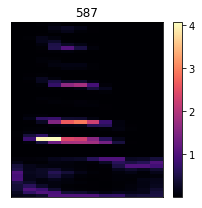

2


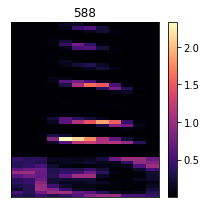

2


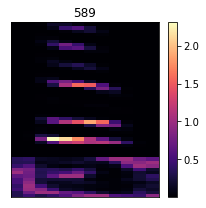

2


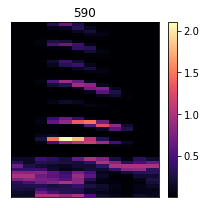

2


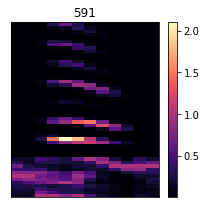

2


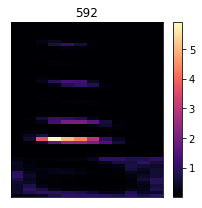

2


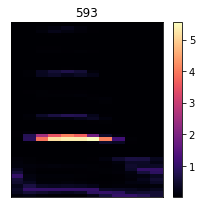

2


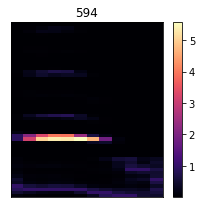

2


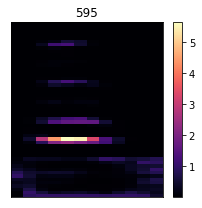

2


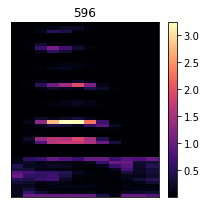

2


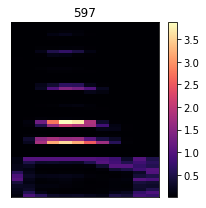

2


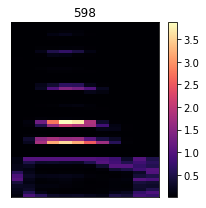

2


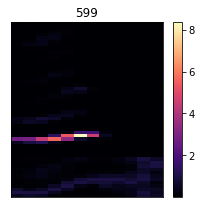

2


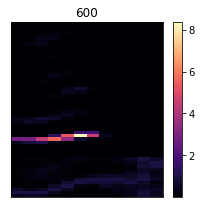

2


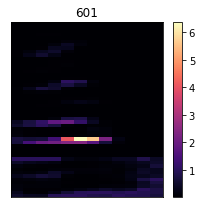

2


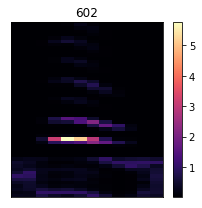

2


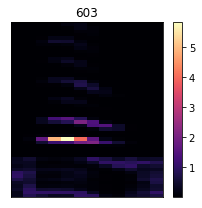

2


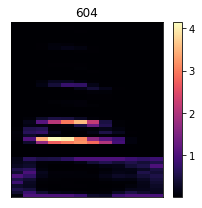

2


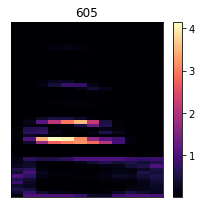

2


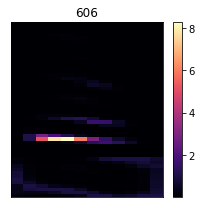

2


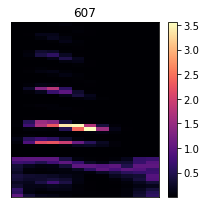

2


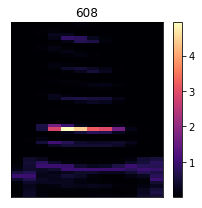

2


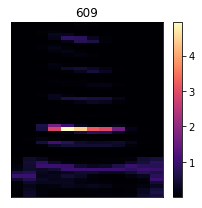

2


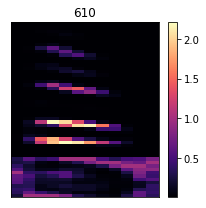

2


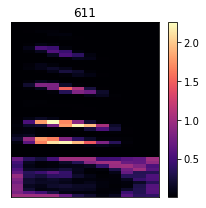

2


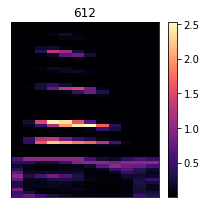

2


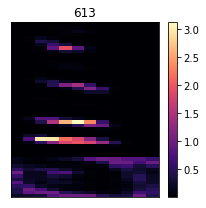

2


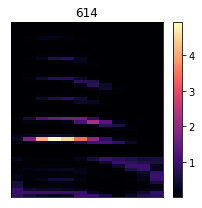

2


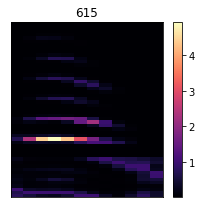

2


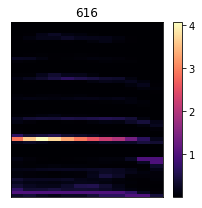

2


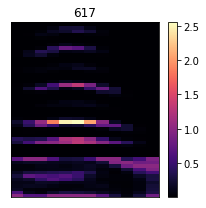

2


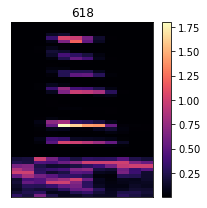

2


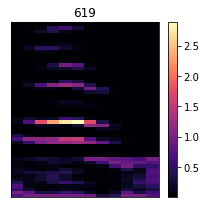

2


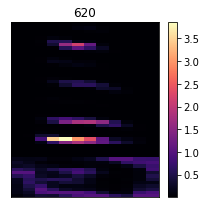

2


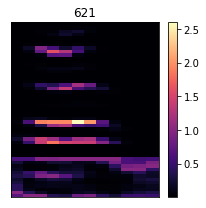

2


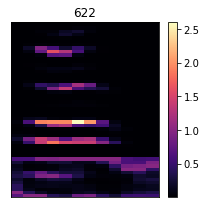

2


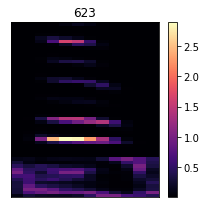

2


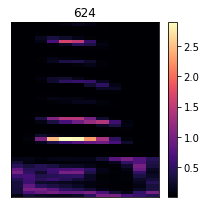

2


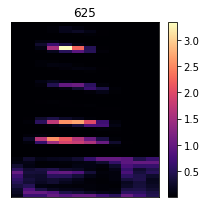

2


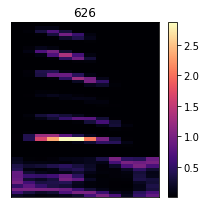

2


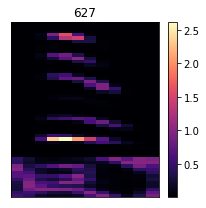

2


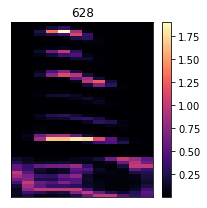

2


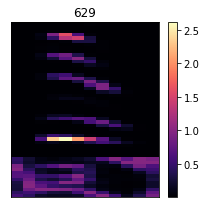

2


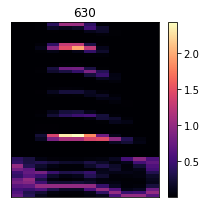

2


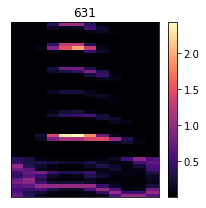

2


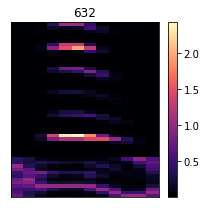

2


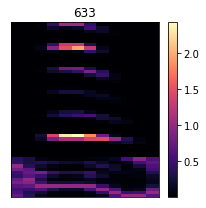

2


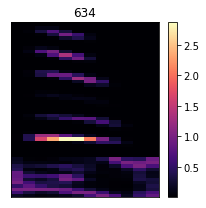

2


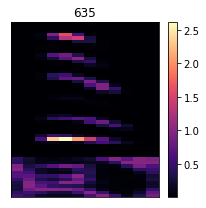

2


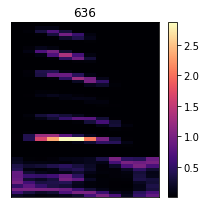

2


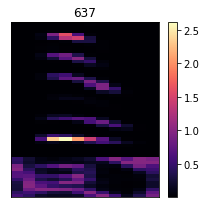

2


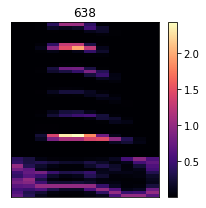

2


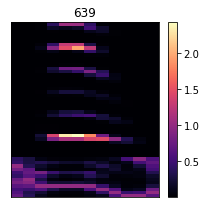

2


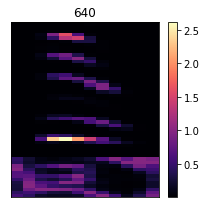

2


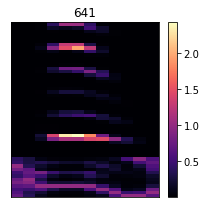

2


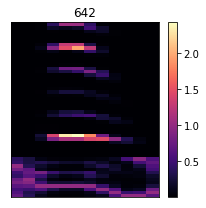

2


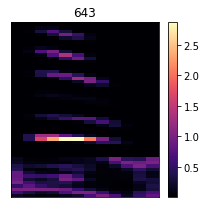

2


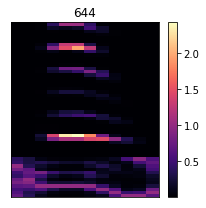

2


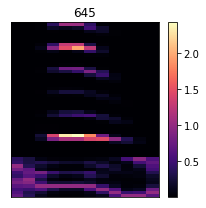

2


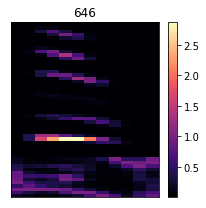

3


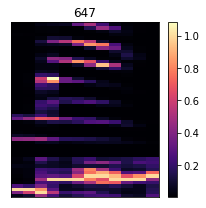

3


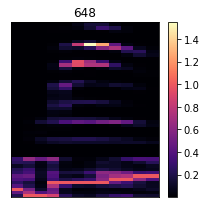

3


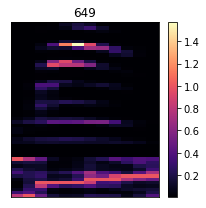

3


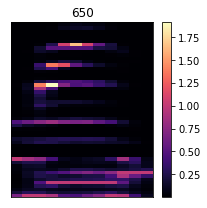

3


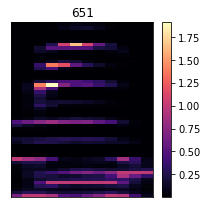

3


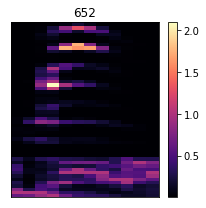

3


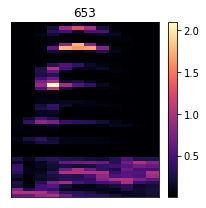

3


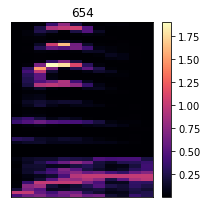

3


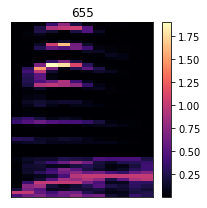

3


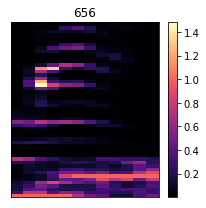

3


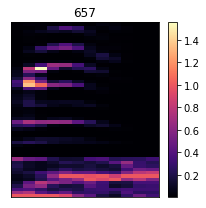

3


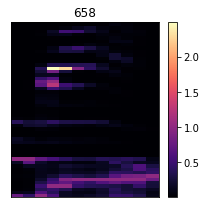

3


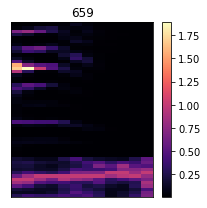

3


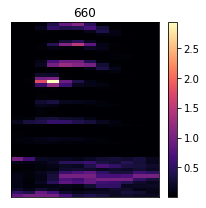

3


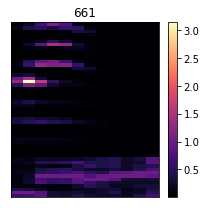

3


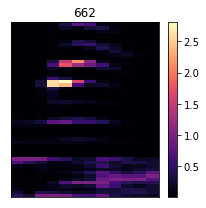

3


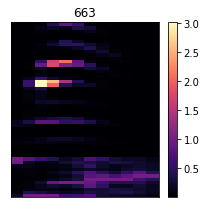

3


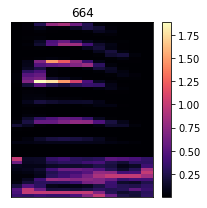

3


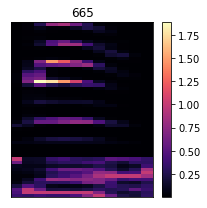

3


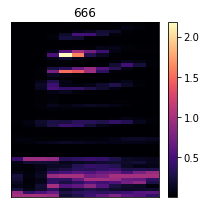

3


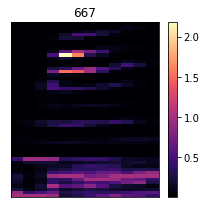

3


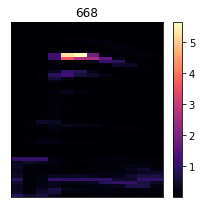

3


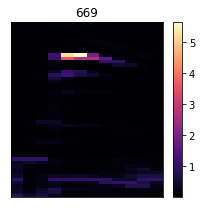

3


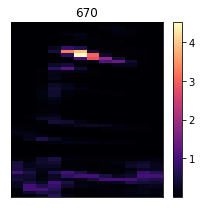

3


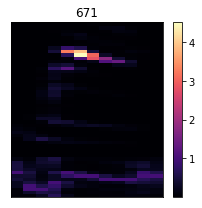

3


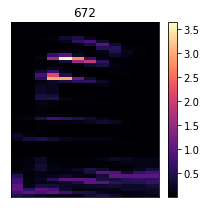

3


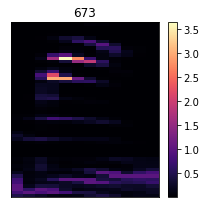

3


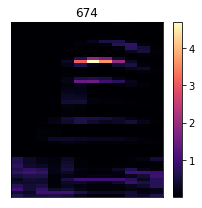

3


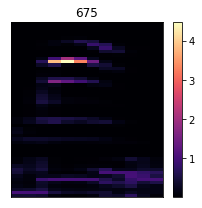

3


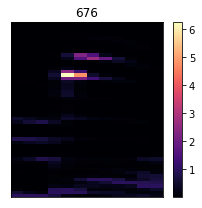

3


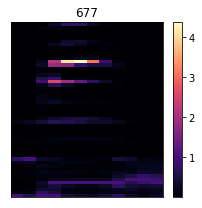

3


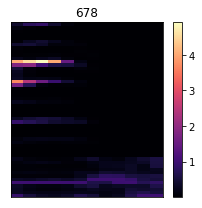

3


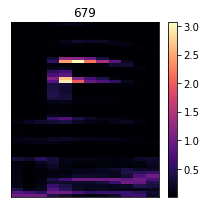

3


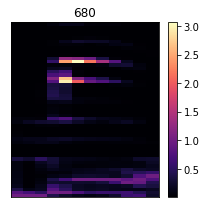

3


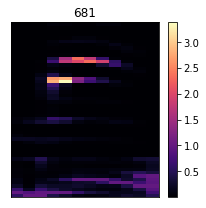

3


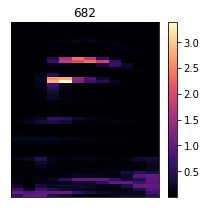

3


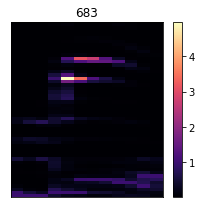

3


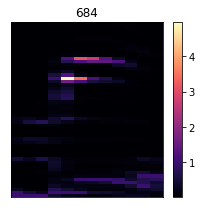

3


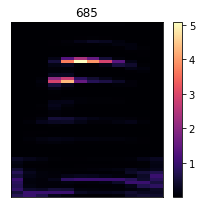

3


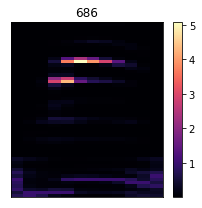

3


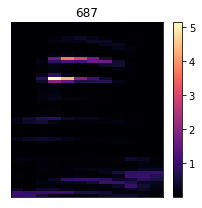

3


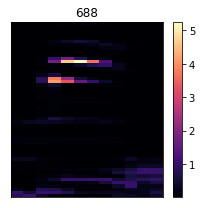

3


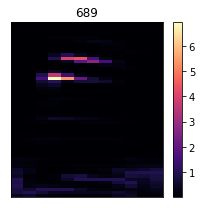

3


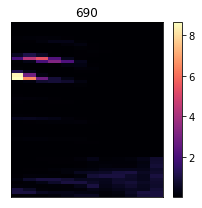

3


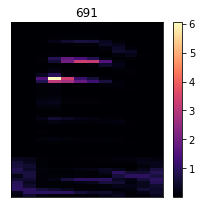

3


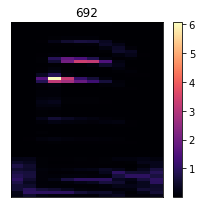

3


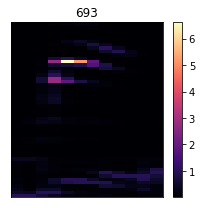

3


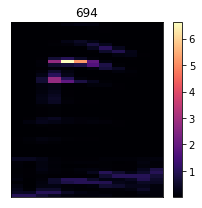

3


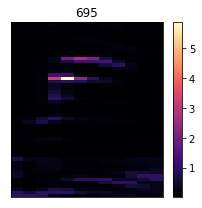

3


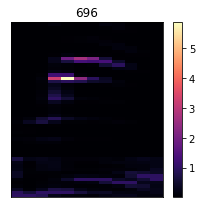

3


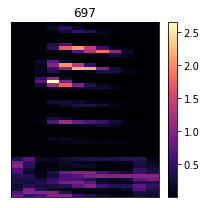

3


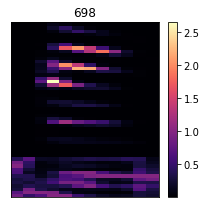

3


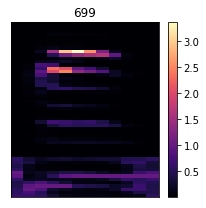

3


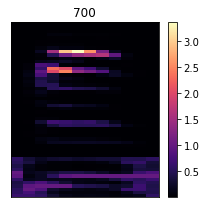

3


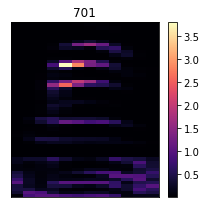

3


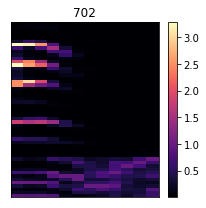

3


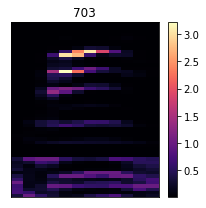

3


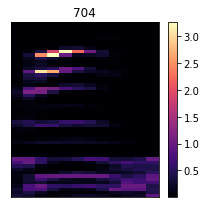

3


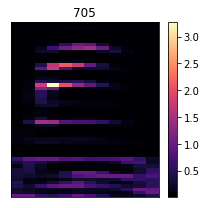

3


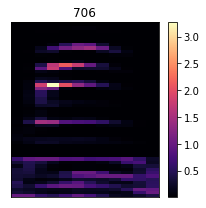

3


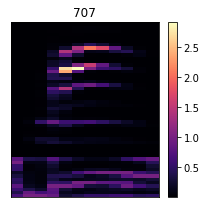

3


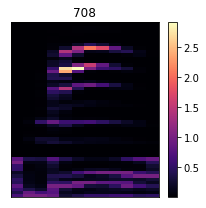

3


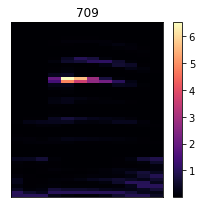

3


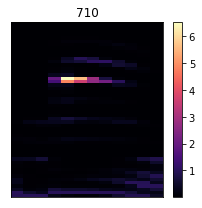

3


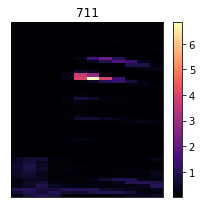

3


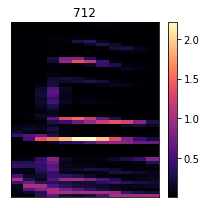

3


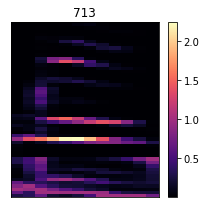

3


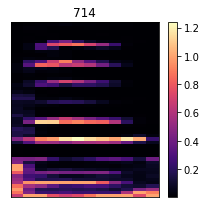

3


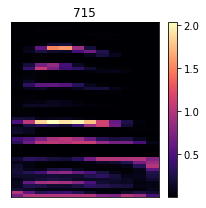

3


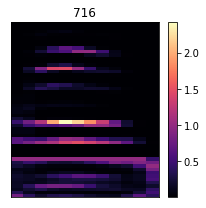

3


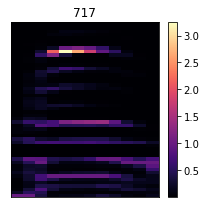

3


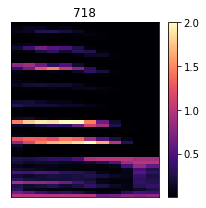

3


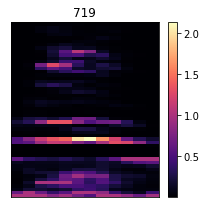

3


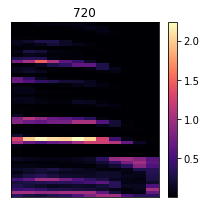

3


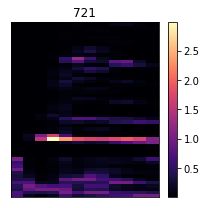

3


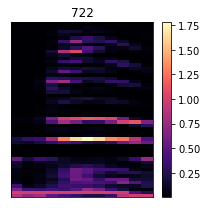

3


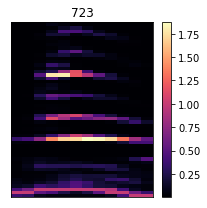

3


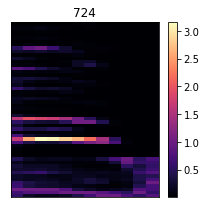

3


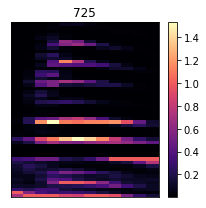

3


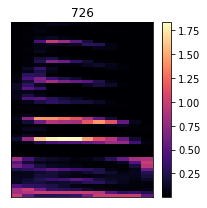

3


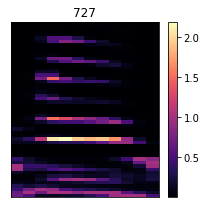

3


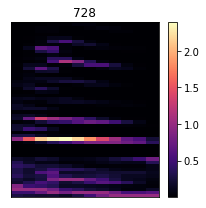

3


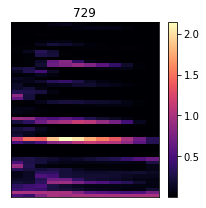

3


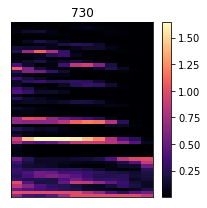

3


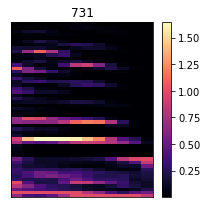

3


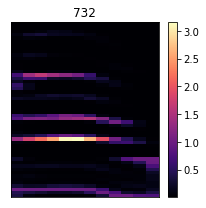

3


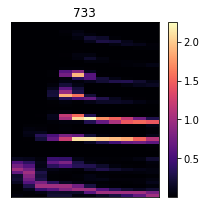

3


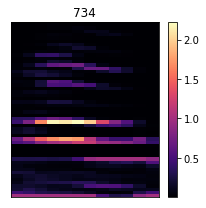

3


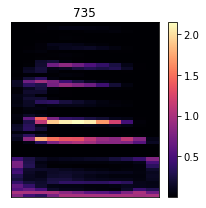

3


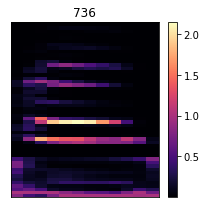

3


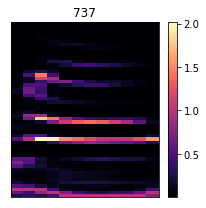

3


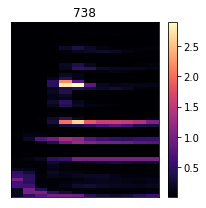

3


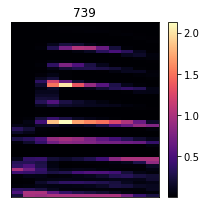

3


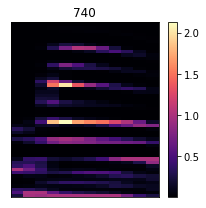

3


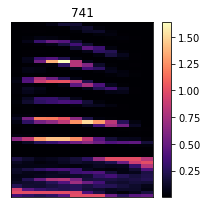

3


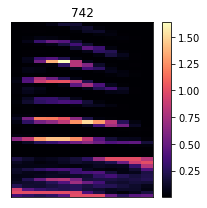

3


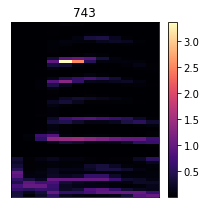

3


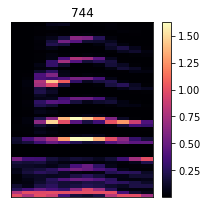

3


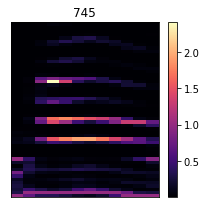

3


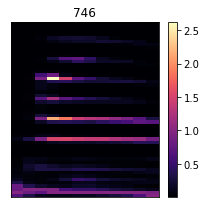

3


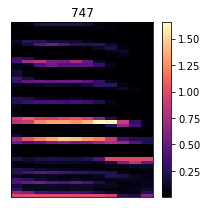

3


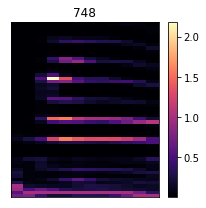

3


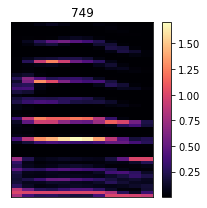

In [12]:
import librosa.display

for i in range(0,750):
    print(all_label[i])
    plt.figure(figsize=(3, 3))
#     librosa.display.specshow(librosa.feature.chroma_stft(y=all_wave[i], sr=16000))#, y_axis='chroma', x_axis='time')
    norm = np.linalg.norm(all_wave[i])
    normal_word = all_wave[i]/norm
    feature_vector_1 = librosa.feature.chroma_stft(y=normal_word, sr=16000)
    feature_vector_2 = librosa.feature.melspectrogram(y=normal_word, sr=16000)[:40]
    feature_vector = np.concatenate((feature_vector_1,feature_vector_2))
    librosa.display.specshow(feature_vector)
    plt.colorbar()
    plt.title(i)
    plt.tight_layout()
    plt.show()

In [15]:
ipd.Audio(all_wave[749], rate=16000)
np.shape(all_wave)

(2867, 6000)

4594
2.2413196092287633


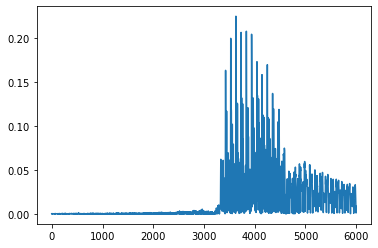

In [5]:
#test code
testId = 160
energy = abs(all_wave[testId])
mean =np.mean(energy)
value = 0
max_val = 0
max_idn = 0
for idn in range(0,len(energy)):
    value += (energy[idn]-value)/1000
    if max_val<value:
        max_val = value
        max_idn = idn
plt.plot(energy)
print(max_idn)
print(max_val/mean)
# mean = np.mean(energy)*2
# cfar = [1 if e > mean else 0 for e in energy]
# plt.plot(cfar)

In [6]:
ipd.Audio(all_wave[testId], rate=16000)

c:\python 3.7\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
c:\python 3.7\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'noise']

NameError: name 'all_label' is not defined

(4965, 6000)

(4965, 6000, 1, 1)


In [14]:
feature_size

(6000, 1, 1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 5988, 8)           112       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 5988, 8)           0         
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 1996, 8)           0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 1996, 8)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 1986, 16)          1424      
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 1986, 16)          0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 662, 16)          

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 52, 12, 16)        416       
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 52, 12, 16)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 26, 6, 16)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 26, 6, 32)         12832     
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 26, 6, 32)         0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 3, 32)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1248)            

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 3475 samples, validate on 1490 samples
Epoch 1/25






Epoch 00001: LearningRateScheduler setting learning rate to 0.005.


ResourceExhaustedError: 2 root error(s) found.
  (0) Resource exhausted: OOM when allocating tensor with shape[3475,1,5988,8] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node conv1d_9/convolution-0-0-TransposeNCHWToNHWC-LayoutOptimizer}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[metrics_2/acc/Mean/_219]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

  (1) Resource exhausted: OOM when allocating tensor with shape[3475,1,5988,8] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node conv1d_9/convolution-0-0-TransposeNCHWToNHWC-LayoutOptimizer}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

0 successful operations.
0 derived errors ignored.

Train on 4468 samples, validate on 497 samples
Epoch 1/5
4468/4468 [==============================] - 1s 149us/step - loss: 0.3042 - acc: 0.9223 - val_loss: 0.3905 - val_acc: 0.9276
Epoch 2/5
4468/4468 [==============================] - 0s 35us/step - loss: 0.3022 - acc: 0.9197 - val_loss: 0.3889 - val_acc: 0.9276
Epoch 3/5
4468/4468 [==============================] - 0s 35us/step - loss: 0.2959 - acc: 0.9257 - val_loss: 0.3859 - val_acc: 0.9276
Epoch 4/5
4468/4468 [==============================] - 0s 34us/step - loss: 0.2975 - acc: 0.9259 - val_loss: 0.3935 - val_acc: 0.9296
Epoch 5/5
4468/4468 [==============================] - 0s 35us/step - loss: 0.2910 - acc: 0.9228 - val_loss: 0.4045 - val_acc: 0.9296


id: 81  prediction: 5  value: 0.2565638
truth: 0
id: 96  prediction: 7  value: 0.8533482
truth: 0
id: 159  prediction: 2  value: 0.7047071
truth: 0
id: 189  prediction: 2  value: 0.990704
truth: 1
id: 215  prediction: 7  value: 0.46284044
truth: 1
id: 243  prediction: 10  value: 0.9880684
truth: 1
id: 269  prediction: 10  value: 0.9993699
truth: 1
id: 271  prediction: 10  value: 0.9185716
truth: 1
id: 357  prediction: 5  value: 0.98147446
truth: 1
id: 509  prediction: 3  value: 0.5198695
truth: 2
id: 566  prediction: 10  value: 0.9804715
truth: 2
id: 591  prediction: 10  value: 0.9901833
truth: 2
id: 592  prediction: 10  value: 0.99996126
truth: 2
id: 593  prediction: 10  value: 1.0
truth: 2
id: 594  prediction: 10  value: 1.0
truth: 2
id: 761  prediction: 10  value: 1.0
truth: 3
id: 776  prediction: 10  value: 1.0
truth: 3


Saved model to disk


* init
* recording
ID: 0  prediction: 10 confident: 0.9128904  time: 2.072875
ID: 1  prediction: 10 confident: 0.96170497  time: 3.5160625
ID: 2  prediction: 7 confident: 0.95377135  time: 4.68825
ID: 3  prediction: 3 confident: 0.93718827  time: 6.46125
ID: 4  prediction: 10 confident: 0.90602446  time: 7.19025
ID: 5  prediction: 4 confident: 0.99794513  time: 9.5256875
ID: 6  prediction: 10 confident: 0.8033655  time: 10.567375
ID: 7  prediction: 10 confident: 0.87282985  time: 14.7904375
ID: 8  prediction: 7 confident: 0.96272224  time: 15.1679375
ID: 9  prediction: 4 confident: 0.9824702  time: 18.2704375
ID: 10  prediction: 10 confident: 0.83502096  time: 19.0089375
ID: 11  prediction: 10 confident: 0.92343414  time: 21.42
ID: 12  prediction: 3 confident: 0.9954478  time: 22.6264375
ID: 13  prediction: 10 confident: 0.9305228  time: 23.475625
ID: 14  prediction: 10 confident: 0.8031464  time: 24.490125
ID: 15  prediction: 8 confident: 0.83166265  time: 25.5585625
ID: 16  predictio

KeyboardInterrupt: 